<a href="https://colab.research.google.com/github/oatthegreat/finalProject/blob/main/Final_Project_Concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/jonpb99/Data_Analytics_List_Comprehension/main/2019.csv', index_col=[0])
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20
1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,...,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68
2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60
3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80
4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70


In [2]:
df.tail()

,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
615,Ray-Ray McCloud,CAR,0,23.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.00
616,Darrius Shepherd,GNB,WR,24.0,6.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.90
617,Jarrett Stidham,NWE,QB,23.0,3.0,0.0,2.0,4.0,14.0,1.0,...,0.0,14.0,0.0,4.0,-2.0,0.0,2.0,0.0,0.0,-1.64
618,Michael Walker,JAX,WR,23.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,-0.50
619,Corey Clement,PHI,0,25.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.00


In [3]:
df1 = df[['Player','Pos','G','GS','PassingYds','PassingTD','Int','RushingYds','RushingTD','FumblesLost','Tgt','Rec','ReceivingYds','ReceivingTD','FantasyPoints']]
df1 = df1[df1['FantasyPoints']>=25]
df1.head()

,Player,Pos,G,GS,PassingYds,PassingTD,Int,RushingYds,RushingTD,FumblesLost,Tgt,Rec,ReceivingYds,ReceivingTD,FantasyPoints
0,Christian McCaffrey,RB,16.0,16.0,0.0,0.0,0.0,1387.0,15.0,0.0,142.0,116.0,1005.0,4.0,469.20
1,Lamar Jackson,QB,15.0,15.0,3127.0,36.0,6.0,1206.0,7.0,2.0,0.0,0.0,0.0,0.0,415.68
2,Derrick Henry,RB,15.0,15.0,0.0,0.0,0.0,1540.0,16.0,3.0,24.0,18.0,206.0,2.0,294.60
3,Aaron Jones,RB,16.0,16.0,0.0,0.0,0.0,1084.0,16.0,2.0,68.0,49.0,474.0,3.0,314.80
4,Ezekiel Elliott,RB,16.0,16.0,0.0,0.0,0.0,1357.0,12.0,2.0,71.0,54.0,420.0,2.0,311.70


In [4]:
df1.tail()

,Player,Pos,G,GS,PassingYds,PassingTD,Int,RushingYds,RushingTD,FumblesLost,Tgt,Rec,ReceivingYds,ReceivingTD,FantasyPoints
352,T.J. Yeldon,RB,6.0,0.0,0.0,0.0,0.0,63.0,0.0,1.0,15.0,13.0,124.0,0.0,29.7
356,Robert Tonyan,TE,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,100.0,1.0,26.0
360,DeAndre Carter,WR,16.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,11.0,162.0,0.0,25.2
361,Seth Devalve,TE,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,12.0,140.0,0.0,26.0
365,Jesse James,TE,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,16.0,142.0,0.0,30.2


In [5]:
df1.rename(columns = {'G':'GamesPlayed', 'GS':'GamesStarted', 'Int':'Interceptions', 'Tgt':'Targets', 'Rec':'Receptions'}, inplace = True)
df1.head()

,Player,Pos,GamesPlayed,GamesStarted,PassingYds,PassingTD,Interceptions,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
0,Christian McCaffrey,RB,16.0,16.0,0.0,0.0,0.0,1387.0,15.0,0.0,142.0,116.0,1005.0,4.0,469.20
1,Lamar Jackson,QB,15.0,15.0,3127.0,36.0,6.0,1206.0,7.0,2.0,0.0,0.0,0.0,0.0,415.68
2,Derrick Henry,RB,15.0,15.0,0.0,0.0,0.0,1540.0,16.0,3.0,24.0,18.0,206.0,2.0,294.60
3,Aaron Jones,RB,16.0,16.0,0.0,0.0,0.0,1084.0,16.0,2.0,68.0,49.0,474.0,3.0,314.80
4,Ezekiel Elliott,RB,16.0,16.0,0.0,0.0,0.0,1357.0,12.0,2.0,71.0,54.0,420.0,2.0,311.70


In [6]:
df['Pos'].unique()

array(['RB', 'QB', 'WR', 'TE', '0'], dtype=object)

In [7]:
df1['Pos'].unique()

array(['RB', 'QB', 'WR', 'TE'], dtype=object)

In [8]:
df['Tm'].unique()

array(['CAR', 'BAL', 'TEN', 'GNB', 'DAL', 'MIN', 'NOR', 'KAN', 'CLE',
       'LAC', 'SEA', 'TAM', 'SFO', 'HOU', 'OAK', 'DET', 'NYG', 'PHI',
       'CIN', 'LAR', 'ATL', 'MIA', 'JAX', 'CHI', 'NWE', 'IND', 'BUF',
       '2TM', 'DEN', 'ARI', 'NYJ', 'WAS', 'PIT', '3TM'], dtype=object)

In [9]:
zero_values = df[df['Pos']=='0'].count()['Pos']
zero_values

63

In [10]:
df1.corr()

,GamesPlayed,GamesStarted,PassingYds,PassingTD,Interceptions,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
GamesPlayed,1.000000,0.389236,0.050411,0.053677,0.026533,0.156865,0.139734,0.104062,0.337608,0.339922,0.312097,0.240397,0.393136
GamesStarted,0.389236,1.000000,0.347228,0.344597,0.302482,0.217377,0.235648,0.325096,0.445750,0.439558,0.446861,0.365425,0.754004
PassingYds,0.050411,0.347228,1.000000,0.977996,0.896531,0.039833,0.123670,0.669873,-0.401870,-0.398134,-0.356925,-0.302406,0.443474
PassingTD,0.053677,0.344597,0.977996,1.000000,0.844411,0.067009,0.136086,0.653717,-0.391202,-0.387699,-0.347173,-0.295005,0.464938
Interceptions,0.026533,0.302482,0.896531,0.844411,1.000000,0.018572,0.100207,0.631601,-0.362114,-0.358304,-0.321633,-0.272284,0.360093
RushingYds,0.156865,0.217377,0.039833,0.067009,0.018572,1.000000,0.863954,0.281495,-0.091075,-0.012148,-0.165696,-0.210378,0.445064
RushingTD,0.139734,0.235648,0.123670,0.136086,0.100207,0.863954,1.000000,0.306363,-0.119221,-0.054093,-0.168544,-0.201362,0.465891
FumblesLost,0.104062,0.325096,0.669873,0.653717,0.631601,0.281495,0.306363,1.000000,-0.235733,-0.221079,-0.221278,-0.223238,0.427750
Targets,0.337608,0.445750,-0.401870,-0.391202,-0.362114,-0.091075,-0.119221,-0.235733,1.000000,0.980119,0.959830,0.748411,0.474521
Receptions,0.339922,0.439558,-0.398134,-0.387699,-0.358304,-0.012148,-0.054093,-0.221079,0.980119,1.000000,0.936475,0.723950,0.509866


# Exploratory Data Analysis (EDA)

## Original DataFrame EDA

Out of all the positions, the quarter back has the most overall fantasy points.

The other positions have several outliers but the average is lower for fantasy points.

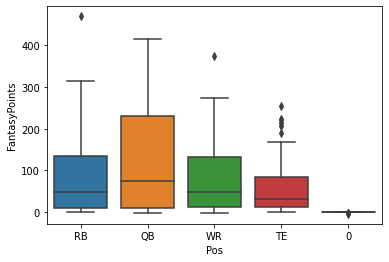

In [11]:
plt1 = sns.boxplot(x="Pos", y="FantasyPoints", data=df)

### Attribute 0: Team Names

[Text(0, 0, 'CAR'),
 Text(0, 0, 'BAL'),
 Text(0, 0, 'TEN'),
 Text(0, 0, 'GNB'),
 Text(0, 0, 'DAL'),
 Text(0, 0, 'MIN'),
 Text(0, 0, 'NOR'),
 Text(0, 0, 'KAN'),
 Text(0, 0, 'CLE'),
 Text(0, 0, 'LAC'),
 Text(0, 0, 'SEA'),
 Text(0, 0, 'TAM'),
 Text(0, 0, 'SFO'),
 Text(0, 0, 'HOU'),
 Text(0, 0, 'OAK'),
 Text(0, 0, 'DET'),
 Text(0, 0, 'NYG'),
 Text(0, 0, 'PHI'),
 Text(0, 0, 'CIN'),
 Text(0, 0, 'LAR'),
 Text(0, 0, 'ATL'),
 Text(0, 0, 'MIA'),
 Text(0, 0, 'JAX'),
 Text(0, 0, 'CHI'),
 Text(0, 0, 'NWE'),
 Text(0, 0, 'IND'),
 Text(0, 0, 'BUF'),
 Text(0, 0, '2TM'),
 Text(0, 0, 'DEN'),
 Text(0, 0, 'ARI'),
 Text(0, 0, 'NYJ'),
 Text(0, 0, 'WAS'),
 Text(0, 0, 'PIT'),
 Text(0, 0, '3TM')]

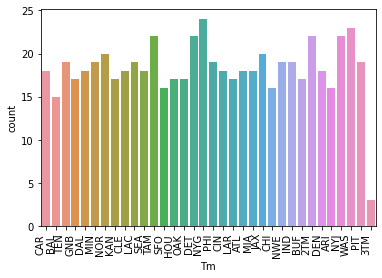

In [12]:
plt1_2 = sns.countplot(x="Tm", data=df)
plt1_2.set_xticklabels(plt1_2.get_xticklabels(), rotation=90, ha="right")

### Attribute 1: Position

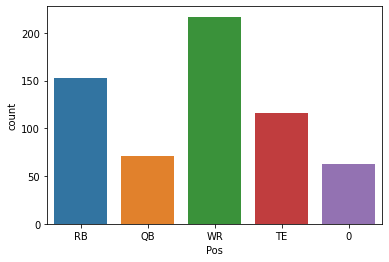

In [13]:
plt1_1 = sns.countplot(x="Pos", data=df)

### Attribute 2: Games Started

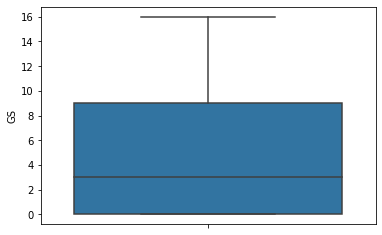

In [14]:
plt2 = sns.boxplot(y="GS", data=df)

### Attribute 3: Passing Yards

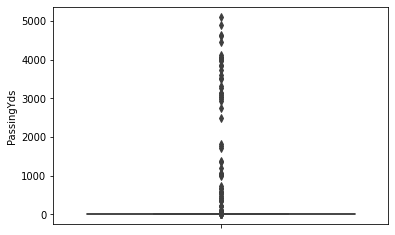

In [15]:
plt3 = sns.boxplot(y="PassingYds", data=df)

### Attribute 4: Passing Touchdowns

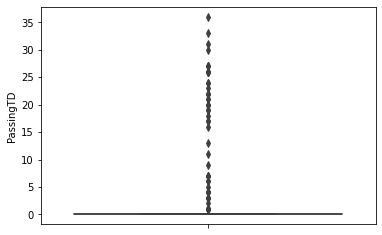

In [16]:
plt4 = sns.boxplot(y="PassingTD", data=df)

### Attribute 5: Interceptions

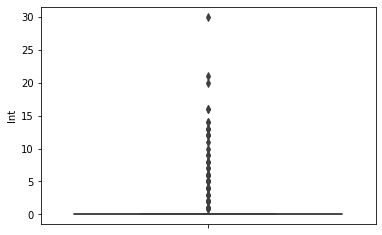

In [17]:
plt5 = sns.boxplot(y="Int", data=df)

### Attribute 6: Rushing Yards

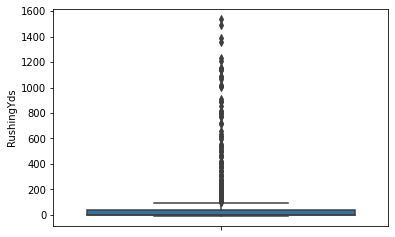

In [18]:
plt6 = sns.boxplot(y="RushingYds", data=df)

### Attribute 7: Rushing Touchdowns

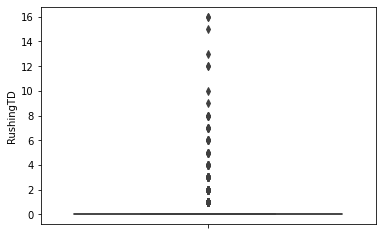

In [19]:
plt7 = sns.boxplot(y="RushingTD", data=df)

### Attribute 8: Fumbles Lost

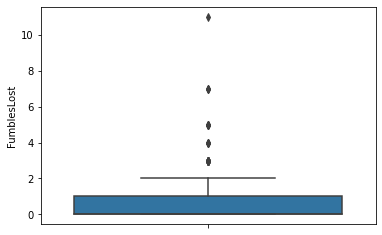

In [20]:
plt8 = sns.boxplot(y="FumblesLost", data=df)

### Attribute 9: Target

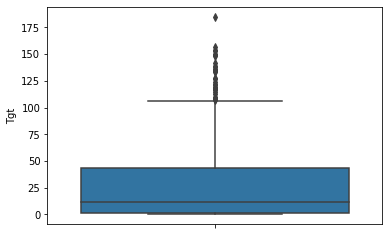

In [21]:
plt9 = sns.boxplot(y="Tgt", data=df)

### Attribute 10: Receptions

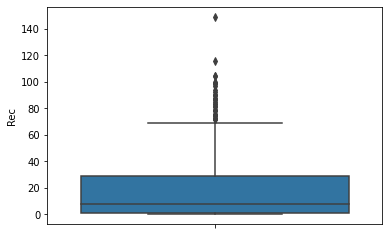

In [22]:
plt10 = sns.boxplot(y="Rec", data=df)

### Attribute 11: Receiving Yards

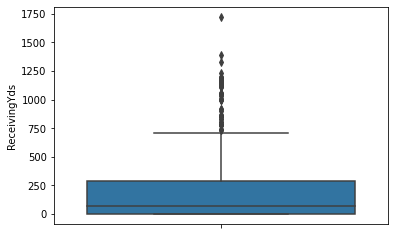

In [23]:
plt11 = sns.boxplot(y="ReceivingYds", data=df)

### Attribute 12: Receiving Touchdowns

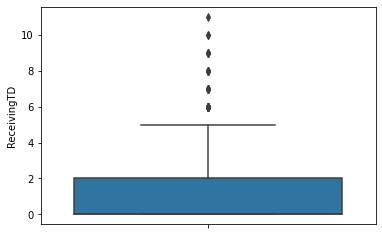

In [24]:
plt12 = sns.boxplot(y="ReceivingTD", data=df)

### Attribute 13: Fantasy Points

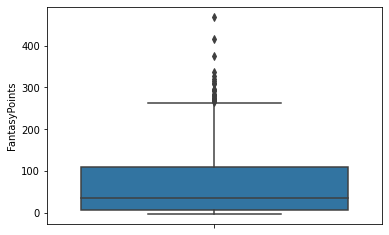

In [25]:
plt13 = sns.boxplot(y="FantasyPoints", data=df)

## Altered DataFrame EDA

On the altered dataframe, the quarterback having the most fantasy points is shown even more.

Out of all the positions, the quarterback has the most overall fantasy points.

The other positions have the outliers but the average is lower for fantasy points compared to the position of quarter back.

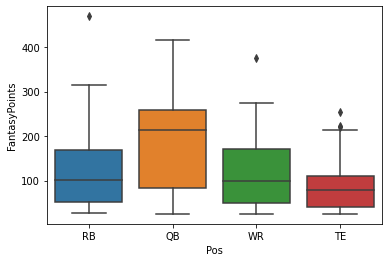

In [26]:
alt_plt1 = sns.boxplot(x="Pos", y="FantasyPoints", data=df1)

### Attribute 1: Position

The position of quarterback has the least amount of players under that role.

(but has the most amount of fantasy points)

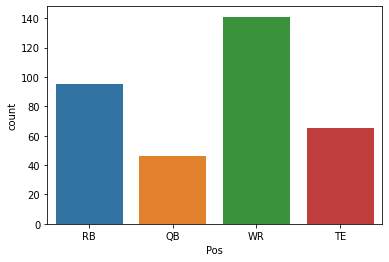

In [27]:
alt_plt1_1 = sns.countplot(x="Pos", data=df1)

### Attribute 2: Games Played

The majority of the players played through most of the season

(a season is 18 matches)

The Outliers could be the result of an injury or poor performance causing them to be replaced by other either inform (performing well) or fit players (non injured)

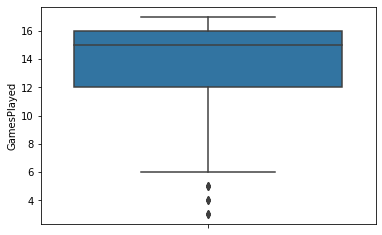

In [28]:
alt_plt2 = sns.boxplot(y="GamesPlayed", data=df1)

### Attribute 3: Passing Yards

The box plot shows the variety of the passing yard attribute

The average is very close to 0 however that is because the majority of players don't pass much

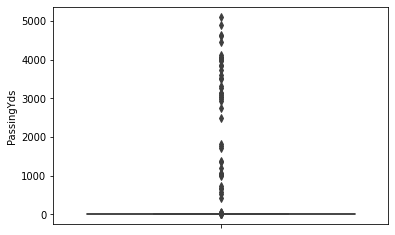

In [29]:
alt_plt3 = sns.boxplot(y="PassingYds", data=df1)

### Attribute 4: Passing Touchdowns

The box plot shows the variety of the passing touchdown attribute

The average is very close to 0 however that is because the majority of players don't pass much

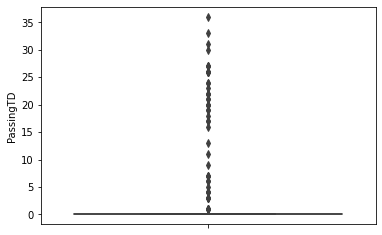

In [30]:
alt_plt4 = sns.boxplot(y="PassingTD", data=df1)

### Attribute 5: Interceptions

The box plot shows the variety of the Interceptions attribute

The average is practically at 0 however that is because the majority of players will not be committing interceptions as it is not their role

However, for players that do commit interceptions, they show up as the outliers on the graph

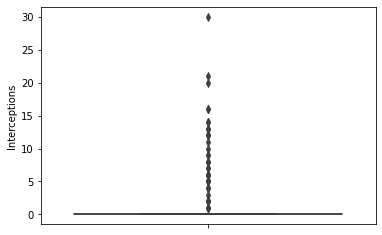

In [31]:
alt_plt5 = sns.boxplot(y="Interceptions", data=df1)

### Attribute 6: Rushing Yards

The box plot shows the variety of the rushing yards attribute

The average is in between 0 and 200 yards with many outliers due to some positions running more than others

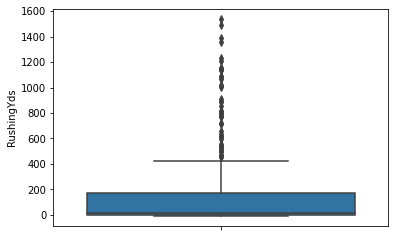

In [32]:
alt_plt6 = sns.boxplot(y="RushingYds", data=df1)

### Attribute 7: Rushing Touchdowns

The box plot shows the variety of the rushing touchdowns attribute

As touchdowns are on a different measurement as opposed to yard, the numbers are completely different in size to previous attributes that were discussed

Most players do 0 to 1 rushing touchdowns with outliers doing more than the average

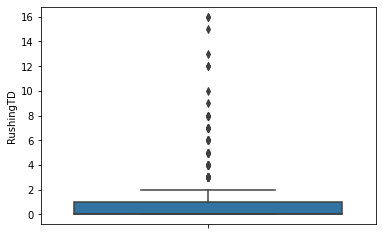

In [33]:
alt_plt7 = sns.boxplot(y="RushingTD", data=df1)

### Attribute 8: Fumbles Lost

The box plot shows the variety of the fumbles lost attribute

The average fumbles lost number is between 0 and 1, outliers are a result of some players being in a position that they can lose fumbles or are just less skilled

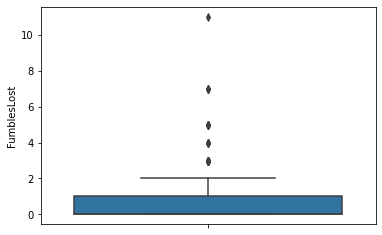

In [34]:
alt_plt8 = sns.boxplot(y="FumblesLost", data=df1)

### Attribute 9: Targets

The box plot shows the variety of the targets attribute

The average targets number is between 20 and 70, the outliers exist due to skill and one of the positions being relevant to the attribute

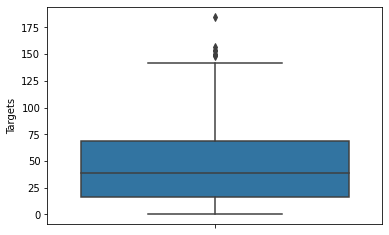

In [35]:
alt_plt9 = sns.boxplot(y="Targets", data=df1)

### Attribute 10: Receptions

The box plot shows the variety of the receptions attribute

The average receptions number is between 10 and 45, outliers are a result of some players being in a position that they can receive receptions more often and it may be from players who are able to receive passes without failing to grab the football

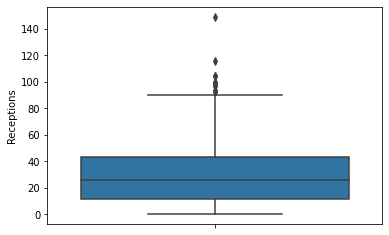

In [36]:
alt_plt10 = sns.boxplot(y="Receptions", data=df1)

### Attribute 11: Receiving Yards

The box plot shows the variety of the receiving yards attribute

The average number for receiving yards is 100 - 500, outliers are due to players that can receive the ball further than most

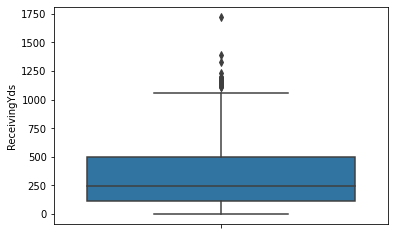

In [37]:
alt_plt11 = sns.boxplot(y="ReceivingYds", data=df1)

### Attribute 12: Receiving Touchdowns

The box plot shows the variety of the receiving touchdowns attribute

As touchdowns are on a different measurement as opposed to yards, the numbers are completely different in size to previous attributes that were discussed

Most players do 0 to 3 receiving touchdowns with outliers doing more than the average

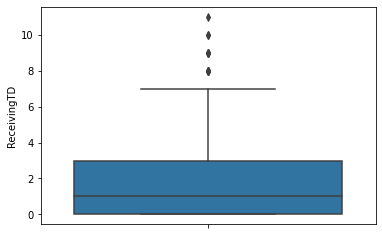

In [38]:
alt_plt12 = sns.boxplot(y="ReceivingTD", data=df1)

### Attribute 13: Fantasy Points

The box plot shows the variety of the fantasy points attribute per player

On average players have a fantasy point rating of 50 and 175, outliers on this graph are the elite players who outperform others.

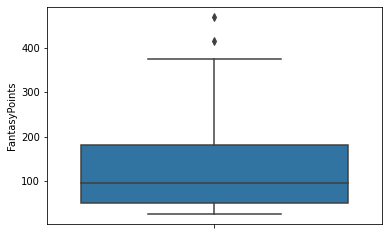

In [39]:
alt_plt13 = sns.boxplot(y="FantasyPoints", data=df1)

The altered data shows the slightly better players (fantasy points >= 25)

But some of the data needs to be split up even further due to zeros being prevalent in the dataset. The dataset will naturally contain zeros, 

# Reshaping / Aggregating / Merging Data

Dataset will be displayed in various ways to hopefully make the data easier to view

Copy of dataframe just in case the data gets altered

In [40]:
df_RAM = df1.copy(deep=True)

## Pivot Table

In [41]:
i1 =['GamesPlayed', 'Player', 'Pos', 'FantasyPoints', 'FumblesLost', 'Interceptions', 'Receptions', 'Targets']
i2 =['FantasyPoints', 'Player', 'GamesPlayed', 'FumblesLost', 'Interceptions', 'Receptions', 'Targets', 'PassingYds', 'PassingTD', 'RushingTD', 'RushingYds', 'ReceivingTD', 'ReceivingYds']

In [42]:
t1 = pd.pivot_table(df_RAM, index = i1)
t1

GamesStarted  \
GamesPlayed Player           Pos FantasyPoints FumblesLost Interceptions Receptions Targets                 
3.0         Brandon Allen    QB  32.5          0.0         2.0           0.0        0.0               3.0   
            Chase Daniel     QB  26.0          0.0         2.0           0.0        0.0               1.0   
            DeSean Jackson   WR  36.9          0.0         0.0           9.0        10.0              3.0   
            Jeff Driskel     QB  58.1          0.0         4.0           1.0        1.0               3.0   
4.0         Duke Williams    WR  34.6          0.0         0.0           12.0       19.0              3.0   
...                                                                                                   ...   
16.0        Tyler Eifert     TE  104.6         0.0         0.0           43.0       63.0              4.0   
            Tyler Lockett    WR  235.2         0.0         0.0           82.0       110.0            16.0   
            Willie Snead     WR  95.1          0.0         0.0           31.0       46.0             11.0   
            Zach Pascal      WR  133.3         0.0         0.0           41.0       72.0             13.0   
17.0        Emmanuel Sanders WR  188.3         0.0         0.0           66.0       97.0             16.0   

                                                                                             PassingTD  \
GamesPlayed Player           Pos FantasyPoints FumblesLost Interceptions Receptions Targets              
3.0         Brandon Allen    QB  32.5          0.0         2.0           0.0        0.0            3.0   
            Chase Daniel     QB  26.0          0.0         2.0           0.0        0.0            3.0   
            DeSean Jackson   WR  36.9          0.0         0.0           9.0        10.0           0.0   
            Jeff Driskel     QB  58.1          0.0         4.0           1.0        1.0            4.0   
4.0         Duke Williams    WR  34.6          0.0         0.0           12.0       19.0           0.0   
...                                                                                                ...   
16.0        Tyler Eifert     TE  104.6         0.0         0.0           43.0       63.0           0.0   
            Tyler Lockett    WR  235.2         0.0         0.0           82.0       110.0          0.0   
            Willie Snead     WR  95.1          0.0         0.0           31.0       46.0           0.0   
            Zach Pascal      WR  133.3         0.0         0.0           41.0       72.0           0.0   
17.0        Emmanuel Sanders WR  188.3         0.0         0.0           66.0       97.0           1.0   

                                                                                             PassingYds  \
GamesPlayed Player           Pos FantasyPoints FumblesLost Interceptions Receptions Targets               
3.0         Brandon Allen    QB  32.5          0.0         2.0           0.0        0.0           515.0   
            Chase Daniel     QB  26.0          0.0         2.0           0.0        0.0           435.0   
            DeSean Jackson   WR  36.9          0.0         0.0           9.0        10.0            0.0   
            Jeff Driskel     QB  58.1          0.0         4.0           1.0        1.0           685.0   
4.0         Duke Williams    WR  34.6          0.0         0.0           12.0       19.0            0.0   
...                                                                                                 ...   
16.0        Tyler Eifert     TE  104.6         0.0         0.0           43.0       63.0            0.0   
            Tyler Lockett    WR  235.2         0.0         0.0           82.0       110.0           0.0   
            Willie Snead     WR  95.1          0.0         0.0           31.0       46.0            0.0   
            Zach Pascal      WR  133.3         0.0         0.0           41.0       72.0            0.0   
17.0        

Pivot alters the index of the dataframe

In [43]:
t2 = pd.pivot_table(df_RAM, index = i2)
t2

GamesStarted
FantasyPoints Player              GamesPlayed FumblesLost Interceptions Receptions Targets PassingYds PassingTD RushingTD RushingYds ReceivingTD ReceivingYds              
25.20         DeAndre Carter      16.0        1.0         0.0           11.0       14.0    0.0        0.0       0.0        0.0       0.0         162.0                  3.0
26.00         Chase Daniel        3.0         0.0         2.0           0.0        0.0     435.0      3.0       0.0        6.0       0.0         0.0                    1.0
              Robert Tonyan       11.0        0.0         0.0           10.0       15.0    0.0        0.0       0.0        0.0       1.0         100.0                  1.0
              Seth Devalve        12.0        0.0         0.0           12.0       18.0    0.0        0.0       0.0        0.0       0.0         140.0                  6.0
26.40         Richie James        16.0        1.0         0.0           6.0        10.0    0.0        0.0       0.0       -1.0       1.0         165.0                  1.0
...                                                                                                                                                                     ...
326.60        Russell Wilson      16.0        2.0         5.0           0.0        0.0     4110.0     31.0      3.0        342.0     0.0         0.0                   16.0
335.78        Dak Prescott        16.0        2.0         11.0          0.0        0.0     4902.0     30.0      3.0        277.0     0.0         0.0                   16.0
374.60        Michael Thomas      16.0        0.0         0.0           149.0      185.0   0.0        0.0       0.0       -9.0       9.0         1725.0                15.0
415.68        Lamar Jackson       15.0        2.0         6.0           0.0        0.0     3127.0     36.0      7.0        1206.0    0.0         0.0                   15.0
469.20        Christian McCaffrey 16.0        0.0         0.0           116.0      142.0   0.0        0.0       15.0       1387.0    4.0         1005.0                16.0

[347 rows x 1 columns]

## Stacking

In [44]:
t3 = df_RAM.stack()
t3

0    Player           Christian McCaffrey
     Pos                               RB
     GamesPlayed                     16.0
     GamesStarted                    16.0
     PassingYds                       0.0
                             ...         
365  Targets                         27.0
     Receptions                      16.0
     ReceivingYds                   142.0
     ReceivingTD                      0.0
     FantasyPoints                   30.2
Length: 5205, dtype: object

Reverts back to its original form

In [45]:
t3_1 = t3.unstack()
t3_1

,Player,Pos,GamesPlayed,GamesStarted,PassingYds,PassingTD,Interceptions,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
0,Christian McCaffrey,RB,16.0,16.0,0.0,0.0,0.0,1387.0,15.0,0.0,142.0,116.0,1005.0,4.0,469.2
1,Lamar Jackson,QB,15.0,15.0,3127.0,36.0,6.0,1206.0,7.0,2.0,0.0,0.0,0.0,0.0,415.68
2,Derrick Henry,RB,15.0,15.0,0.0,0.0,0.0,1540.0,16.0,3.0,24.0,18.0,206.0,2.0,294.6
3,Aaron Jones,RB,16.0,16.0,0.0,0.0,0.0,1084.0,16.0,2.0,68.0,49.0,474.0,3.0,314.8
4,Ezekiel Elliott,RB,16.0,16.0,0.0,0.0,0.0,1357.0,12.0,2.0,71.0,54.0,420.0,2.0,311.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,T.J. Yeldon,RB,6.0,0.0,0.0,0.0,0.0,63.0,0.0,1.0,15.0,13.0,124.0,0.0,29.7
356,Robert Tonyan,TE,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,100.0,1.0,26.0
360,DeAndre Carter,WR,16.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,11.0,162.0,0.0,25.2
361,Seth Devalve,TE,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,12.0,140.0,0.0,26.0


## Melt

Melt allows for multiple columns to be combined into one

In [46]:
t4 = pd.melt(df_RAM, id_vars='Player', value_vars=['GamesPlayed'])
t4

,Player,variable,value
0,Christian McCaffrey,GamesPlayed,16.0
1,Lamar Jackson,GamesPlayed,15.0
2,Derrick Henry,GamesPlayed,15.0
3,Aaron Jones,GamesPlayed,16.0
4,Ezekiel Elliott,GamesPlayed,16.0
...,...,...,...
342,T.J. Yeldon,GamesPlayed,6.0
343,Robert Tonyan,GamesPlayed,11.0
344,DeAndre Carter,GamesPlayed,16.0
345,Seth Devalve,GamesPlayed,12.0


In [47]:
t4_1 = t4.pivot('Player', 'variable', 'value')
t4_1

variable,GamesPlayed
Player,
A.J. Brown,16.0
Aaron Jones,16.0
Aaron Rodgers,16.0
Adam Humphries,12.0
Adam Thielen,10.0
...,...
Will Fuller,11.0
Willie Snead,16.0
Zach Ertz,15.0


#Data cleaning

In [48]:
df1.shape

(347, 15)

In [49]:
#statiitics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
GamesPlayed,347.0,13.305476,3.294600,3.0,12.00,15.00,16.00,17.0
GamesStarted,347.0,7.881844,5.392179,0.0,3.00,7.00,13.00,16.0
PassingYds,347.0,358.953890,1054.712885,0.0,0.00,0.00,0.00,5109.0
PassingTD,347.0,2.265130,6.764325,0.0,0.00,0.00,0.00,36.0
Interceptions,347.0,1.089337,3.522115,0.0,0.00,0.00,0.00,30.0
RushingYds,347.0,161.230548,299.999796,-12.0,0.00,17.00,172.50,1540.0
RushingTD,347.0,1.265130,2.585871,0.0,0.00,0.00,1.00,16.0
FumblesLost,347.0,0.743516,1.308236,0.0,0.00,0.00,1.00,11.0
Targets,347.0,46.014409,38.730540,0.0,16.50,39.00,68.50,185.0
Receptions,347.0,30.708934,26.080445,0.0,11.50,26.00,43.00,149.0


In [50]:
#identify the data types 
df_info = pd.DataFrame(df1.dtypes,columns=['Dtype'])

#identify the unique values
df_info['Nunique'] = df1.nunique()

#checking missing values for each columns
df_info['MissingValues'] = df1.isnull().sum()

#identify the count for each variable 
df_info['Count'] = df1.count()

#Identify the zero value for each variable
df_info['ZeroValues'] = (df1 == 0).sum()

#Number of '?'
df_info['?Values'] = (df1 == ' ?').sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
Player,object,347,0,347,0,0
Pos,object,4,0,347,0,0
GamesPlayed,float64,15,0,347,0,0
GamesStarted,float64,17,0,347,28,0
PassingYds,float64,58,0,347,287,0
PassingTD,float64,25,0,347,297,0
Interceptions,float64,19,0,347,300,0
RushingYds,float64,162,0,347,111,0
RushingTD,float64,15,0,347,227,0
FumblesLost,float64,8,0,347,206,0


In [51]:
#Checing our numerical and catorgorical data 
numerical_columns = []
catagorical_columns = []

for i in df1.columns[ : ]:
  if(df1[i].dtypes == 'object'):
    catagorical_columns.append(i)
  else:
    numerical_columns.append(i)

print("Numerical: " , numerical_columns)
print("catorgorical: " , catagorical_columns)

Numerical:  ['GamesPlayed', 'GamesStarted', 'PassingYds', 'PassingTD', 'Interceptions', 'RushingYds', 'RushingTD', 'FumblesLost', 'Targets', 'Receptions', 'ReceivingYds', 'ReceivingTD', 'FantasyPoints']
catorgorical:  ['Player', 'Pos']


# Feature enginering & Selection

In [52]:
df.dtypes

Player            object
Tm                object
Pos               object
Age              float64
G                float64
GS               float64
Cmp              float64
Att              float64
Yds              float64
Int              float64
Att.1            float64
Yds.1            float64
Tgt              float64
Rec              float64
Yds.2            float64
Y/R              float64
Fumbles          float64
FumblesLost      float64
PassingYds       float64
PassingTD        float64
PassingAtt       float64
RushingYds       float64
RushingTD        float64
RushingAtt       float64
ReceivingYds     float64
ReceivingTD      float64
FantasyPoints    float64
dtype: object

In [53]:
df1_cat = df1.select_dtypes(object)
df1_num = df1.select_dtypes(["float64"])


In [54]:
df1_num.head()

,GamesPlayed,GamesStarted,PassingYds,PassingTD,Interceptions,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
0,16.0,16.0,0.0,0.0,0.0,1387.0,15.0,0.0,142.0,116.0,1005.0,4.0,469.20
1,15.0,15.0,3127.0,36.0,6.0,1206.0,7.0,2.0,0.0,0.0,0.0,0.0,415.68
2,15.0,15.0,0.0,0.0,0.0,1540.0,16.0,3.0,24.0,18.0,206.0,2.0,294.60
3,16.0,16.0,0.0,0.0,0.0,1084.0,16.0,2.0,68.0,49.0,474.0,3.0,314.80
4,16.0,16.0,0.0,0.0,0.0,1357.0,12.0,2.0,71.0,54.0,420.0,2.0,311.70


In [55]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
df1_new = pd.concat([df1_num,df1_cat], axis=1)
df1_new.head()

,GamesPlayed,GamesStarted,PassingYds,PassingTD,Interceptions,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD,FantasyPoints,Player,Pos
0,16.0,16.0,0.0,0.0,0.0,1387.0,15.0,0.0,142.0,116.0,1005.0,4.0,469.20,Christian McCaffrey,RB
1,15.0,15.0,3127.0,36.0,6.0,1206.0,7.0,2.0,0.0,0.0,0.0,0.0,415.68,Lamar Jackson,QB
2,15.0,15.0,0.0,0.0,0.0,1540.0,16.0,3.0,24.0,18.0,206.0,2.0,294.60,Derrick Henry,RB
3,16.0,16.0,0.0,0.0,0.0,1084.0,16.0,2.0,68.0,49.0,474.0,3.0,314.80,Aaron Jones,RB
4,16.0,16.0,0.0,0.0,0.0,1357.0,12.0,2.0,71.0,54.0,420.0,2.0,311.70,Ezekiel Elliott,RB


In [56]:
df1_new['RushingYds'] = mx.fit_transform(df1_new['RushingYds'].values.reshape(-1,1))
df1_new['PassingYds'] = mx.fit_transform(df1_new['PassingYds'].values.reshape(-1,1))
df1_new['ReceivingYds'] = mx.fit_transform(df1_new['ReceivingYds'].values.reshape(-1,1))
df1_new['Targets'] = mx.fit_transform(df1_new['Targets'].values.reshape(-1,1))


In [57]:
df1_new.head()

,GamesPlayed,GamesStarted,PassingYds,PassingTD,Interceptions,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD,FantasyPoints,Player,Pos
0,16.0,16.0,0.000000,0.0,0.0,0.901418,15.0,0.0,0.767568,116.0,0.583574,4.0,469.20,Christian McCaffrey,RB
1,15.0,15.0,0.612057,36.0,6.0,0.784794,7.0,2.0,0.000000,0.0,0.002313,0.0,415.68,Lamar Jackson,QB
2,15.0,15.0,0.000000,0.0,0.0,1.000000,16.0,3.0,0.129730,18.0,0.121457,2.0,294.60,Derrick Henry,RB
3,16.0,16.0,0.000000,0.0,0.0,0.706186,16.0,2.0,0.367568,49.0,0.276460,3.0,314.80,Aaron Jones,RB
4,16.0,16.0,0.000000,0.0,0.0,0.882088,12.0,2.0,0.383784,54.0,0.245228,2.0,311.70,Ezekiel Elliott,RB


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df1_cat["Player"])

array([ 54, 212, 101,   1, 120,  68, 245, 325, 258,  21, 226,  66, 225,
       293,  51, 124, 103,  49,  80, 203, 300, 344, 173, 321, 157,  57,
       188,  92, 218, 151,  22,  14, 247,   0,  89, 184, 199, 251,  11,
       187,  13, 228, 161, 181, 334,  64, 205, 269, 275, 211,  60, 305,
       174, 133, 244,   2, 333,  62, 288,  43, 278,  67, 216, 248,  40,
        85, 318, 331, 238,  94, 233,  42, 335,  82, 304, 322, 162, 158,
       170,  99, 207, 294, 273,  23, 123, 111, 296, 144,  73,  16, 252,
       298, 208, 240, 106, 243, 289,   5,  63, 155, 265, 117, 215,  77,
       156, 104,  56,  61, 319, 152, 249,  69, 286,  50, 113, 234, 150,
        84, 108,  44, 128, 214,  34, 271, 179, 336, 230, 279,  53, 291,
       242, 345, 217,  93, 317, 154, 299, 131,  90, 312, 172, 342, 224,
       134, 306, 235,   4, 315, 122, 310, 204,  74,  12, 115,  31,  79,
        19, 307, 206, 210, 282, 263, 323,  30,  59, 274, 129,  47, 262,
       186, 177, 142,  96, 202,  10, 112, 280, 175, 119, 253, 33

In [59]:
le.fit_transform(df1_cat["Pos"])

array([1, 0, 1, 1, 1, 1, 3, 2, 1, 1, 1, 0, 2, 0, 3, 2, 0, 1, 2, 3, 1, 2,
       1, 1, 2, 3, 3, 3, 1, 0, 2, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 0,
       3, 3, 1, 0, 1, 0, 3, 3, 3, 2, 3, 0, 2, 3, 3, 0, 1, 2, 1, 2, 3, 1,
       3, 3, 0, 3, 3, 1, 3, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 3, 3, 1, 1, 1, 0, 3, 0, 3, 3, 1, 3, 0, 1, 3, 3, 3, 3, 0,
       3, 2, 3, 3, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 2, 3, 2, 2, 3, 3, 3, 0,
       1, 3, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 1, 3, 1, 0, 1, 1, 3, 2, 3, 3,
       2, 3, 2, 1, 2, 0, 0, 3, 2, 2, 3, 1, 3, 2, 1, 2, 0, 3, 1, 2, 3, 1,
       2, 3, 3, 1, 3, 2, 2, 1, 1, 2, 3, 1, 2, 2, 2, 1, 3, 2, 1, 1, 3, 0,
       1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 1, 3, 0, 1, 1, 3, 3, 3, 1, 3, 3, 2,
       2, 1, 3, 2, 0, 3, 0, 3, 3, 3, 3, 3, 1, 3, 2, 1, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 1, 0, 2, 3, 3, 1, 3, 1, 3, 3, 2,

In [60]:
# #create X and Y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df1.drop(['GamesPlayed', 'Player' , 'Pos'], axis = 1)

y = df1[['GamesPlayed']]

# #now splitting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.03, random_state = 12)

X_train.head()

,GamesStarted,PassingYds,PassingTD,Interceptions,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
280,0.0,0.0,0.0,0.0,50.0,4.0,0.0,2.0,1.0,7.0,0.0,30.70
283,9.0,0.0,0.0,0.0,-7.0,0.0,0.0,58.0,28.0,296.0,0.0,56.90
91,15.0,3138.0,17.0,10.0,193.0,2.0,2.0,0.0,0.0,0.0,0.0,200.82
126,12.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,42.0,651.0,6.0,143.10
82,13.0,3529.0,20.0,13.0,243.0,4.0,2.0,0.0,0.0,0.0,0.0,239.46


In [61]:
from sklearn.preprocessing import StandardScaler

#set up numerical data 
numerical_columns_new2 = ['GamesStarted', 'PassingYds', 'PassingTD',	'Interceptions',	'RushingYds',	'RushingTD',	'FumblesLost',	'Targets',	'Receptions',	'ReceivingYds',	'ReceivingTD',	'FantasyPoints']

#disable setting copy warning
pd.options.mode.chained_assignment = None

#feature scaling
sc = StandardScaler()

for i in numerical_columns_new2[:1]:
  X_train[i] = X_train[i].astype('float64')
  X_train[i] = sc.fit_transform(X_train[i].values.reshape(-1,1))

X_train.head()

,GamesStarted,PassingYds,PassingTD,Interceptions,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
280,-1.466191,0.0,0.0,0.0,50.0,4.0,0.0,2.0,1.0,7.0,0.0,30.70
283,0.201264,0.0,0.0,0.0,-7.0,0.0,0.0,58.0,28.0,296.0,0.0,56.90
91,1.312900,3138.0,17.0,10.0,193.0,2.0,2.0,0.0,0.0,0.0,0.0,200.82
126,0.757082,0.0,0.0,0.0,0.0,0.0,0.0,64.0,42.0,651.0,6.0,143.10
82,0.942355,3529.0,20.0,13.0,243.0,4.0,2.0,0.0,0.0,0.0,0.0,239.46


In [62]:
#check results

print('Training data set shape: ', X_train.shape, y_train.shape)
print('Testing data set shape: ', X_test.shape, y_test.shape)

Training data set shape:  (336, 12) (336, 1)
Testing data set shape:  (11, 12) (11, 1)


In [63]:
#calculate corellation matrix
corr_results = X_test.corr()
corr_results = corr_results.stack()
corr_results[(corr_results != 1.0) & ((corr_results > 0.8) | (corr_results < 0.8))]

GamesStarted   PassingYds       0.630075
               PassingTD        0.615287
               Interceptions    0.645085
               RushingYds      -0.379581
               RushingTD       -0.327600
                                  ...   
FantasyPoints  FumblesLost      0.757936
               Targets          0.146405
               Receptions       0.132684
               ReceivingYds     0.184905
               ReceivingTD      0.104856
Length: 132, dtype: float64

In [64]:
#variable features & target
target = df1['ReceivingTD']
features = df1.drop(['Player','Pos'],axis=1).copy()

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#to wrap on RFE
lr = LinearRegression()

#prune one feature on each iteration
#select 3
rfe = RFE(estimator = lr, n_features_to_select = 5, step = 1)

rfe.fit(features,target)

rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['PassingTD', 'Interceptions', 'FumblesLost', 'Receptions',
       'ReceivingTD'],
      dtype='object')


In [66]:
rfe_output = pd.DataFrame({'Features' : features.columns, "Rank" : rfe.ranking_}).sort_values(by="Rank")

#output the entire list
print(rfe_output)

         Features  Rank
3       PassingTD     1
4   Interceptions     1
7     FumblesLost     1
9      Receptions     1
11    ReceivingTD     1
6       RushingTD     2
12  FantasyPoints     3
5      RushingYds     4
10   ReceivingYds     5
2      PassingYds     6
0     GamesPlayed     7
1    GamesStarted     8
8         Targets     9


# 

#Logistic regression (Logit) model



In [67]:
import statsmodels.api as sm

var = ['GamesStarted', 'PassingYds', 'PassingTD',	'Interceptions',	'RushingYds',	'RushingTD',	'FumblesLost',
         'Targets',	'Receptions',	'ReceivingYds',	'ReceivingTD']
#define response variable
y = df1['FantasyPoints']

#define predictor variables
x = df1[['GamesStarted', 'PassingYds', 'PassingTD',	'Interceptions',	'RushingYds',	'RushingTD',	'FumblesLost',
         'Targets',	'Receptions',	'ReceivingYds',	'ReceivingTD']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view summary of model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          FantasyPoints   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.693e+30
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:00:24   Log-Likelihood:                 9759.5
No. Observations:                 347   AIC:                        -1.949e+04
Df Residuals:                     335   BIC:                        -1.945e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.465e-13   1.61e-14     -9.089

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#SVM Model & KNN & 10-Fold cross

In [68]:
df1.FumblesLost.value_counts()

0.0     206
1.0      85
2.0      29
3.0      14
5.0       5
4.0       4
7.0       3
11.0      1
Name: FumblesLost, dtype: int64

In [69]:
df1.Interceptions.value_counts()

0.0     300
5.0       6
6.0       6
2.0       5
1.0       4
8.0       3
12.0      3
13.0      3
4.0       3
16.0      2
7.0       2
14.0      2
9.0       2
30.0      1
20.0      1
21.0      1
10.0      1
11.0      1
3.0       1
Name: Interceptions, dtype: int64

In [70]:
#do OneHotEncoder for non-binary categorical data
FumblesLost = pd.get_dummies(df1['FumblesLost'])
Interceptions = pd.get_dummies(df1['ReceivingTD'])
ohe_df = df1.filter(['Player','Pos','GamesStarted', 'PassingYds', 'PassingTD','RushingYds',	'RushingTD',	'FumblesLost',
         'Targets',	'Receptions',	'ReceivingYds',	'ReceivingTD'], axis = 1)
FumblesLost.columns = ['f1','f2','f3','f4','f5','f6','f7','f8']
ohe_df = ohe_df.join(FumblesLost)
Interceptions.columns = ['h1','h2','h3','h4','h5','h6','h7','h8','h9','h10','h11','h12']#,'h13','h14','h15','h16','h17','h18','h19']
ohe_df = ohe_df.join(Interceptions)
ohe_df.head()

,Player,Pos,GamesStarted,PassingYds,PassingTD,RushingYds,RushingTD,FumblesLost,Targets,Receptions,...,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12
0,Christian McCaffrey,RB,16.0,0.0,0.0,1387.0,15.0,0.0,142.0,116.0,...,0,0,1,0,0,0,0,0,0,0
1,Lamar Jackson,QB,15.0,3127.0,36.0,1206.0,7.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Derrick Henry,RB,15.0,0.0,0.0,1540.0,16.0,3.0,24.0,18.0,...,1,0,0,0,0,0,0,0,0,0
3,Aaron Jones,RB,16.0,0.0,0.0,1084.0,16.0,2.0,68.0,49.0,...,0,1,0,0,0,0,0,0,0,0
4,Ezekiel Elliott,RB,16.0,0.0,0.0,1357.0,12.0,2.0,71.0,54.0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
g_df=(ohe_df-ohe_df.mean())/(2*ohe_df.std())

theDir = (ohe_df['PassingYds'] - ohe_df['PassingYds'].mean())/ohe_df['PassingYds'].std()
theHir = (ohe_df['PassingTD'] - ohe_df['PassingTD'].mean())/ohe_df['PassingTD'].std()
theLvr = (ohe_df['FumblesLost'] - ohe_df['FumblesLost'].mean())/ohe_df['FumblesLost'].std()
theUer = (ohe_df['ReceivingTD'] - ohe_df['ReceivingTD'].mean())/ohe_df['ReceivingTD'].std()
transformed_data = pd.DataFrame([theDir,theHir,theLvr,theUer]).T
reg_df = ohe_df.drop(['PassingYds','PassingTD','FumblesLost','ReceivingTD'], axis =1 )
reg_df = reg_df.join(transformed_data)
reg_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Player,Pos,GamesStarted,RushingYds,RushingTD,Targets,Receptions,ReceivingYds,f1,f2,...,h7,h8,h9,h10,h11,h12,PassingYds,PassingTD,FumblesLost,ReceivingTD
0,Christian McCaffrey,RB,16.0,1387.0,15.0,142.0,116.0,1005.0,1,0,...,0,0,0,0,0,0,-0.340333,-0.334864,-0.568334,0.745403
1,Lamar Jackson,QB,15.0,1206.0,7.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,2.624455,4.987175,0.960441,-0.907343
2,Derrick Henry,RB,15.0,1540.0,16.0,24.0,18.0,206.0,0,0,...,0,0,0,0,0,0,-0.340333,-0.334864,1.724829,-0.080970
3,Aaron Jones,RB,16.0,1084.0,16.0,68.0,49.0,474.0,0,0,...,0,0,0,0,0,0,-0.340333,-0.334864,0.960441,0.332216
4,Ezekiel Elliott,RB,16.0,1357.0,12.0,71.0,54.0,420.0,0,0,...,0,0,0,0,0,0,-0.340333,-0.334864,0.960441,-0.080970


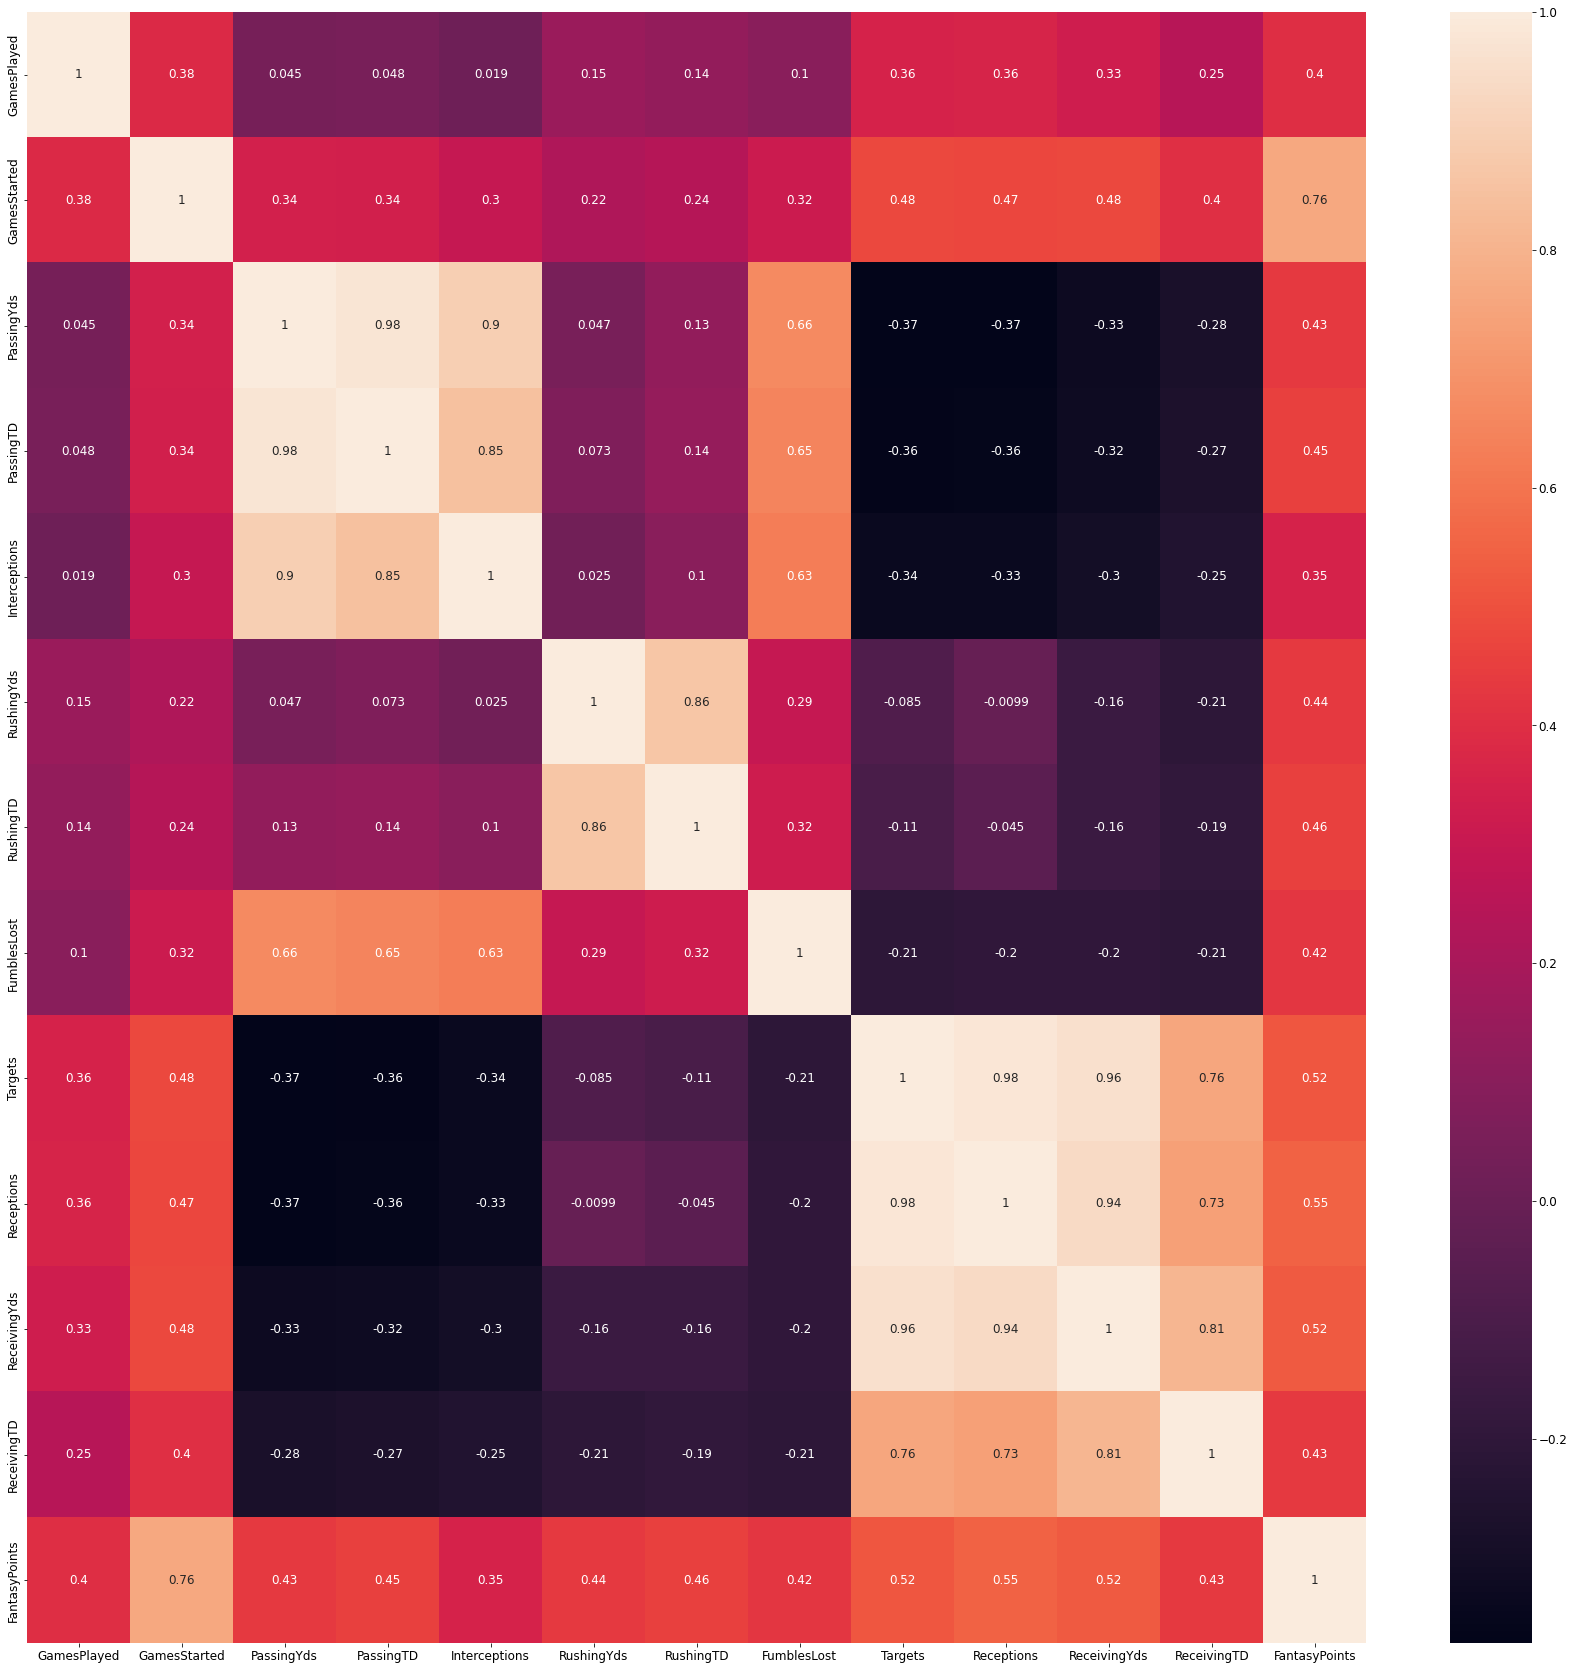

In [72]:
# show visual representation of the correlation matrix
withinq = df1.merge(df1['FantasyPoints'])
corrMatrix = withinq.corr()
plt.rcParams.update({'font.size': 12,'figure.figsize':(30,30)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot


In [73]:
#create a dataframe of the correlation matrix threshold of .1
corr_columns = ['GamesStarted', 'PassingYds', 'PassingTD',	'Interceptions',	'RushingYds',	'RushingTD',	'FumblesLost',
         'Targets',	'Receptions',	'ReceivingYds',	'ReceivingTD']

corr_df = reg_df.filter(corr_columns, axis = 1)
corr_df.head()

,GamesStarted,PassingYds,PassingTD,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD
0,16.0,-0.340333,-0.334864,1387.0,15.0,-0.568334,142.0,116.0,1005.0,0.745403
1,15.0,2.624455,4.987175,1206.0,7.0,0.960441,0.0,0.0,0.0,-0.907343
2,15.0,-0.340333,-0.334864,1540.0,16.0,1.724829,24.0,18.0,206.0,-0.080970
3,16.0,-0.340333,-0.334864,1084.0,16.0,0.960441,68.0,49.0,474.0,0.332216
4,16.0,-0.340333,-0.334864,1357.0,12.0,0.960441,71.0,54.0,420.0,-0.080970


In [74]:
df1.RushingTD.value_counts()

0.0     227
1.0      35
2.0      24
3.0      18
4.0      10
6.0       7
5.0       7
7.0       6
8.0       5
16.0      2
12.0      2
15.0      1
13.0      1
10.0      1
9.0       1
Name: RushingTD, dtype: int64

In [75]:
df1.ReceivingTD.value_counts()

0.0     108
1.0      76
2.0      44
3.0      36
5.0      22
6.0      20
4.0      18
7.0       8
8.0       7
9.0       5
10.0      2
11.0      1
Name: ReceivingTD, dtype: int64

In [76]:
import sklearn.metrics as metrics
from patsy import dmatrices

y , X = dmatrices('FumblesLost ~ PassingYds + ReceivingYds / C(RushingTD) + C(ReceivingTD)',df, return_type="dataframe")


In [77]:
# fix column names of X
X = X.rename(columns = {'C(RushingTD)[T.1.0]':'RushingTD_1',
                        'C(RushingTD)[T.2.0]':'RushingTD_2',
                        'C(RushingTD)[T.3.0]':'RushingTD_3',
                        'C(RushingTD)[T.4.0]':'RushingTD_4',
                        'C(RushingTD)[T.5.0]':'RushingTD_5',
                        'C(RushingTD)[T.6.0]':'RushingTD_6',
                        'C(RushingTD)[T.7.0]':'RushingTD_7',
                        'C(RushingTD)[T.8.0]':'RushingTD_8',
                        'C(RushingTD)[T.9.0]':'RushingTD_9',
                        'C(RushingTD)[T.10.0]':'RushingTD_10',
                        'C(RushingTD)[T.11.0]':'RushingTD_11',
                        'C(RushingTD)[T.12.0]':'RushingTD_12',
                        'C(RushingTD)[T.13.0]':'RushingTD_13',
                        'C(RushingTD)[T.14.0]':'RushingTD_14',
                        'C(RushingTD)[T.15.0]':'RushingTD_15',
                        'C(ReceivingTD)[T.1.0]':'ReceivingTD1',
                        'C(ReceivingTD)[T.2.0]':'ReceivingTD2',
                        'C(ReceivingTD)[T.3.0]':'ReceivingTD3',
                        'C(ReceivingTD)[T.4.0]':'ReceivingTD4',
                        'C(ReceivingTD)[T.5.0]':'ReceivingTD5',
                        'C(ReceivingTD)[T.6.0]':'ReceivingTD6',
                        'C(ReceivingTD)[T.7.0]':'ReceivingTD7',
                        'C(ReceivingTD)[T.8.0]':'ReceivingTD8',
                        'C(ReceivingTD)[T.9.0]':'ReceivingTD9',
                        'C(ReceivingTD)[T.10.0]':'ReceivingTD10',
                        'C(ReceivingTD)[T.11.0]':'ReceivingTD11',
                        'C(ReceivingTD)[T.12.0]':'ReceivingTD12'})

In [78]:
# flatten y into a 1-D array
y = np.ravel(y)


In [79]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7435483870967742

#K Fold Cross Validation

In [80]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

In [81]:
import numpy as np

from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.22580645 0.29032258 0.30645161 0.61290323 0.56451613 0.61290323
 0.75806452 0.88709677 0.9516129  0.82258065]
0.6032258064516128


# Ensemble

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>svm 0.957 (0.020)


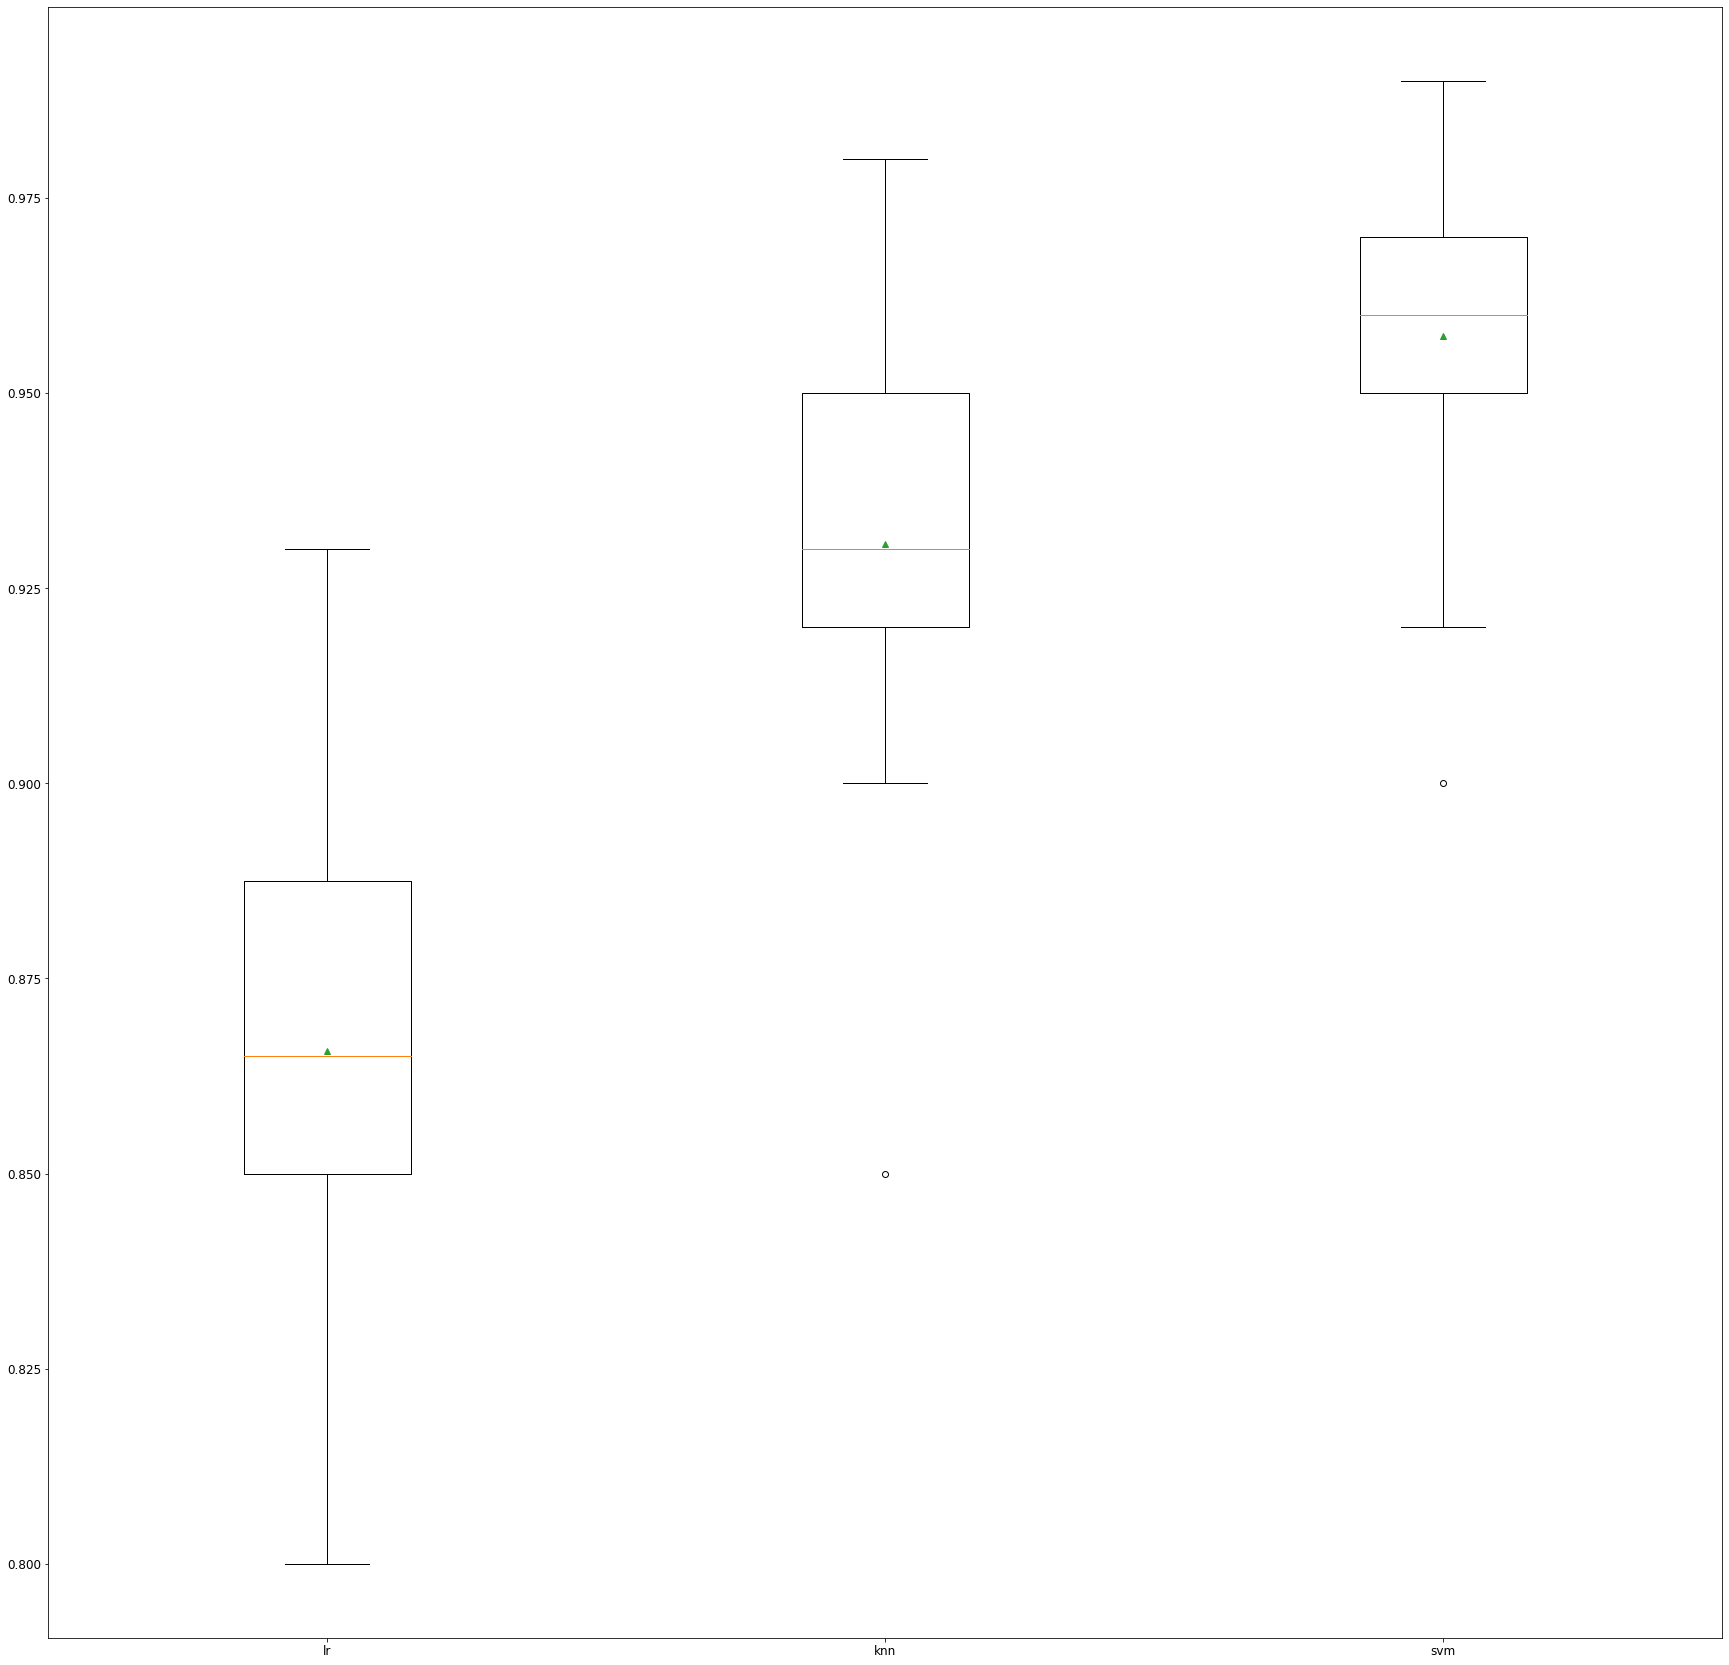

In [82]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	
	models['svm'] = SVC()
	
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# R-square

In [83]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = df[[ 'PassingYds', 'PassingTD',	'RushingYds',	'RushingTD',	'FumblesLost',
        		'ReceivingYds',	'ReceivingTD']], df.FantasyPoints

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)



0.9939847417866523


# Graphics that Support the Conclusion

In [84]:
df_rb = df1[df1['Pos']=='RB']
df_qb = df1[df1['Pos']=='QB']
df_wr = df1[df1['Pos']=='WR']
df_te = df1[df1['Pos']=='TE']

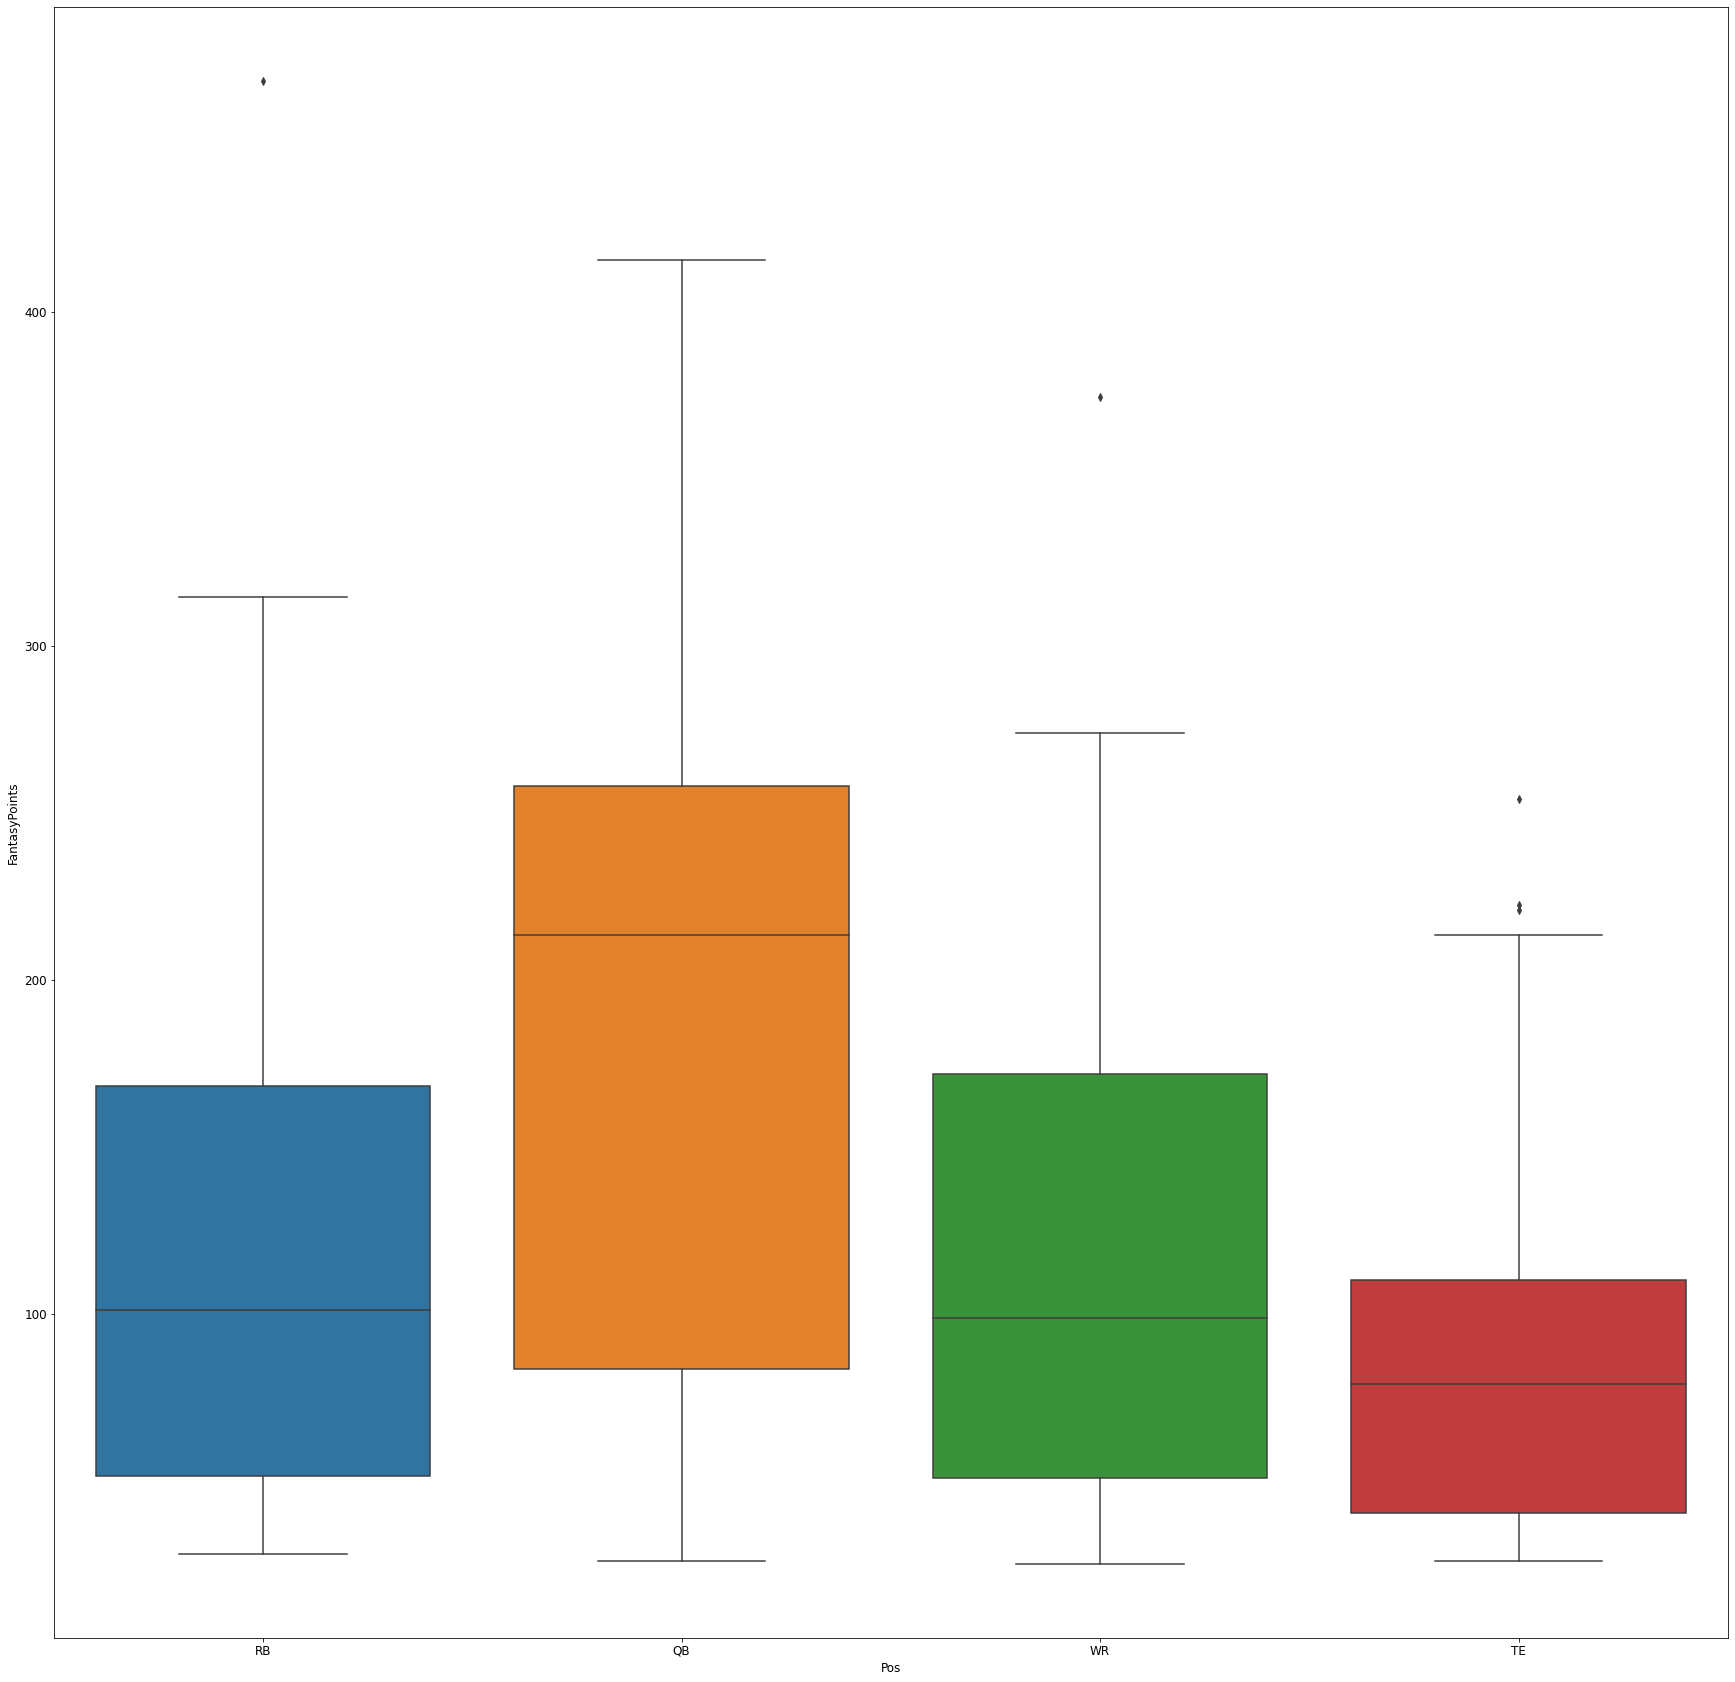

In [85]:
alt_plt1 = sns.boxplot(x="Pos", y="FantasyPoints", data=df1)

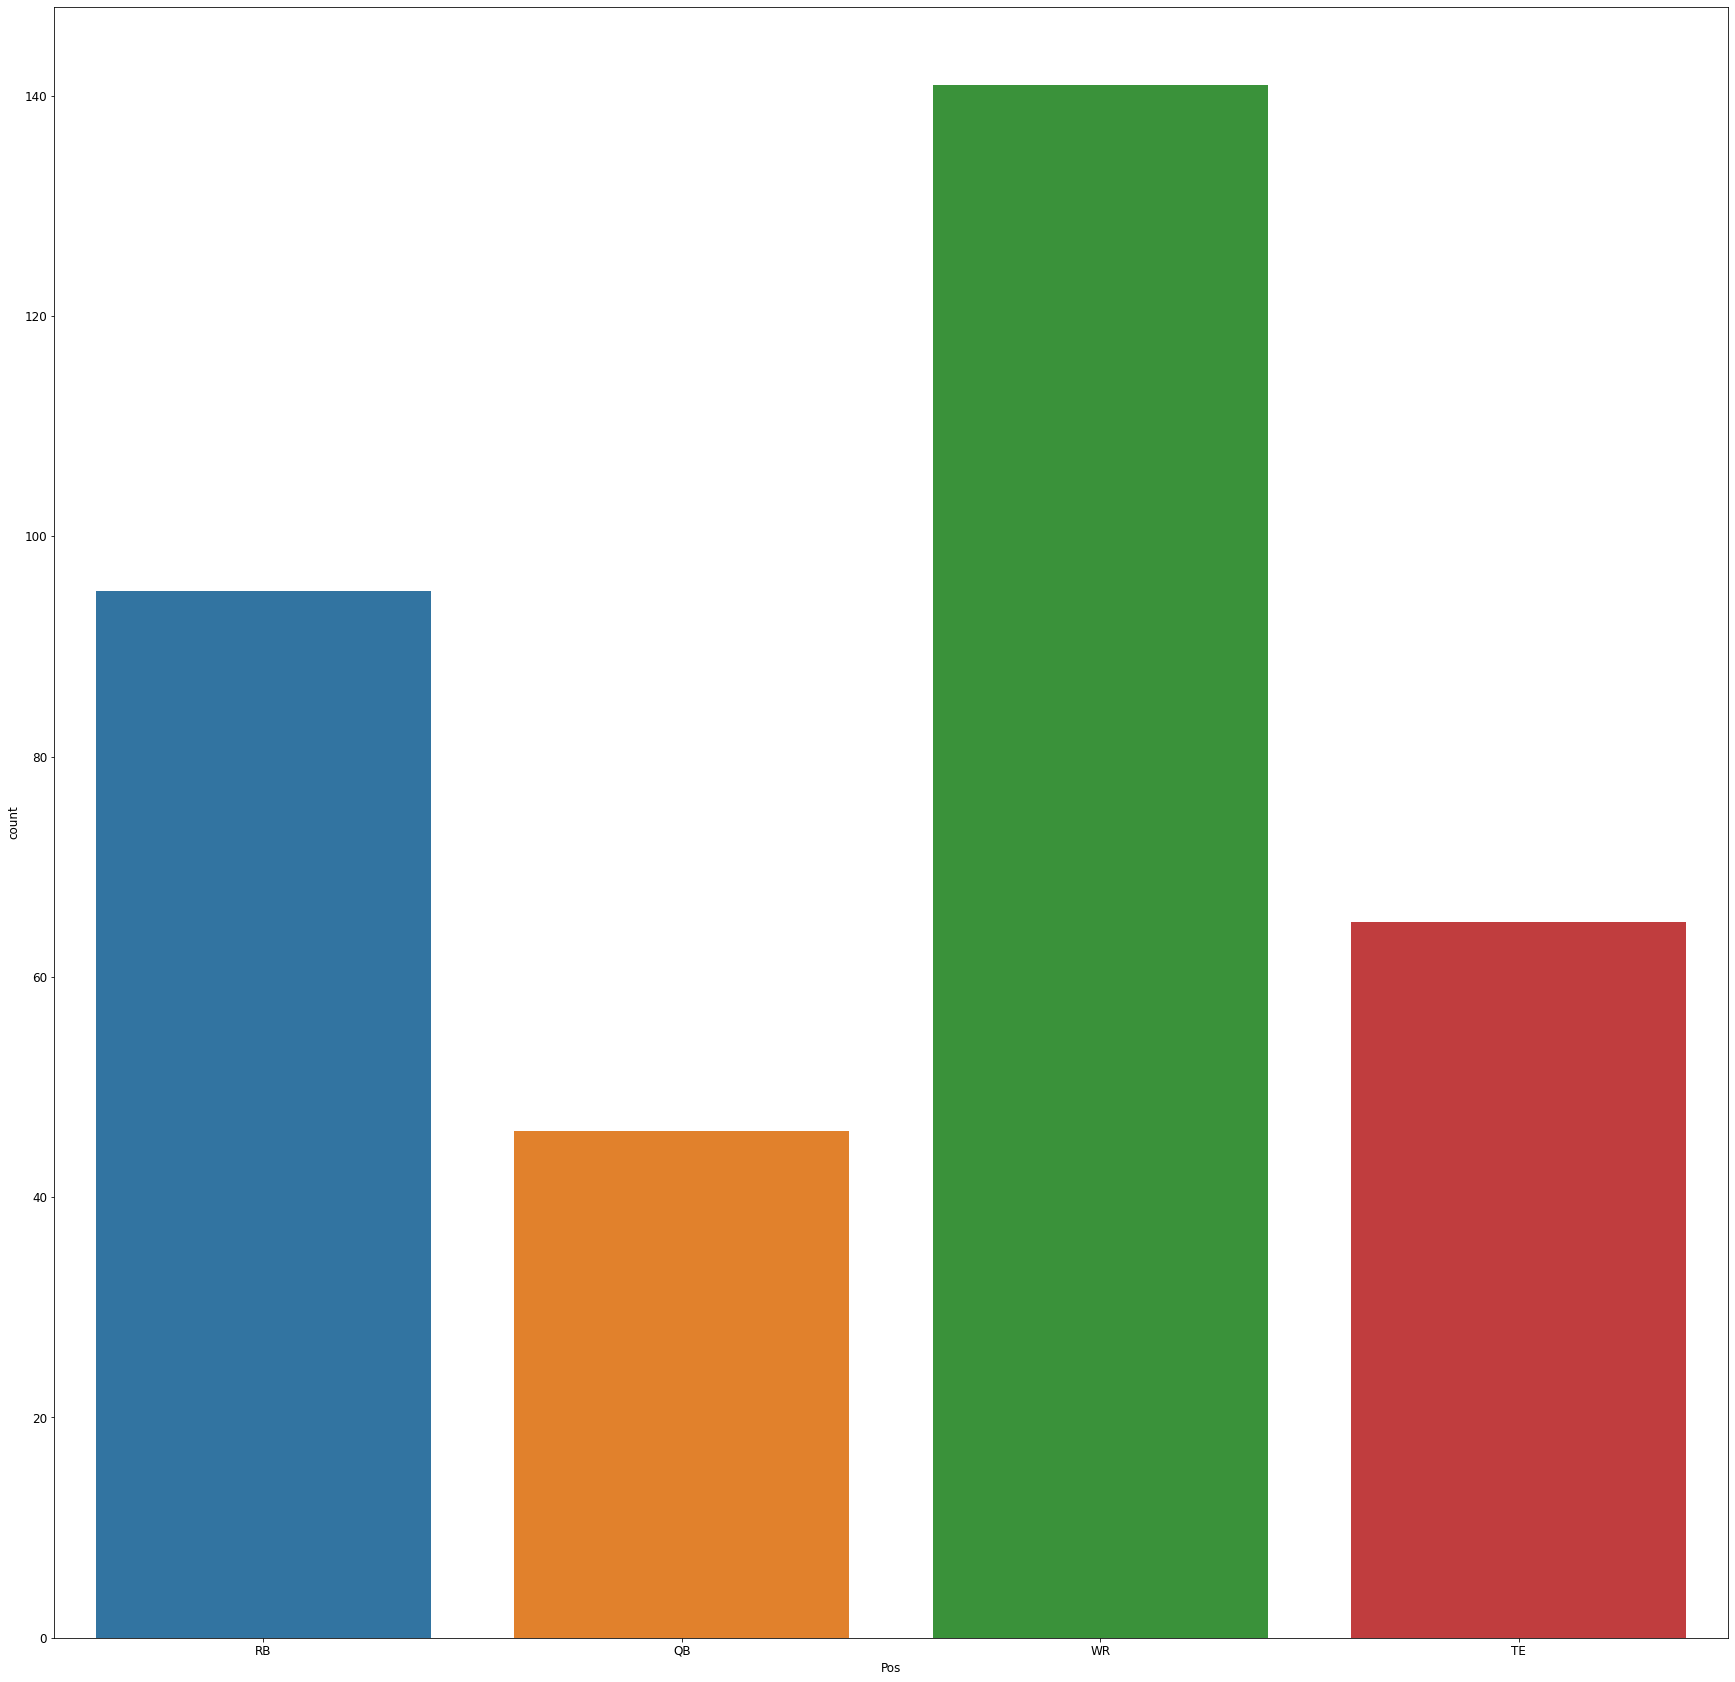

In [86]:
sns.countplot(x="Pos", data=df1)

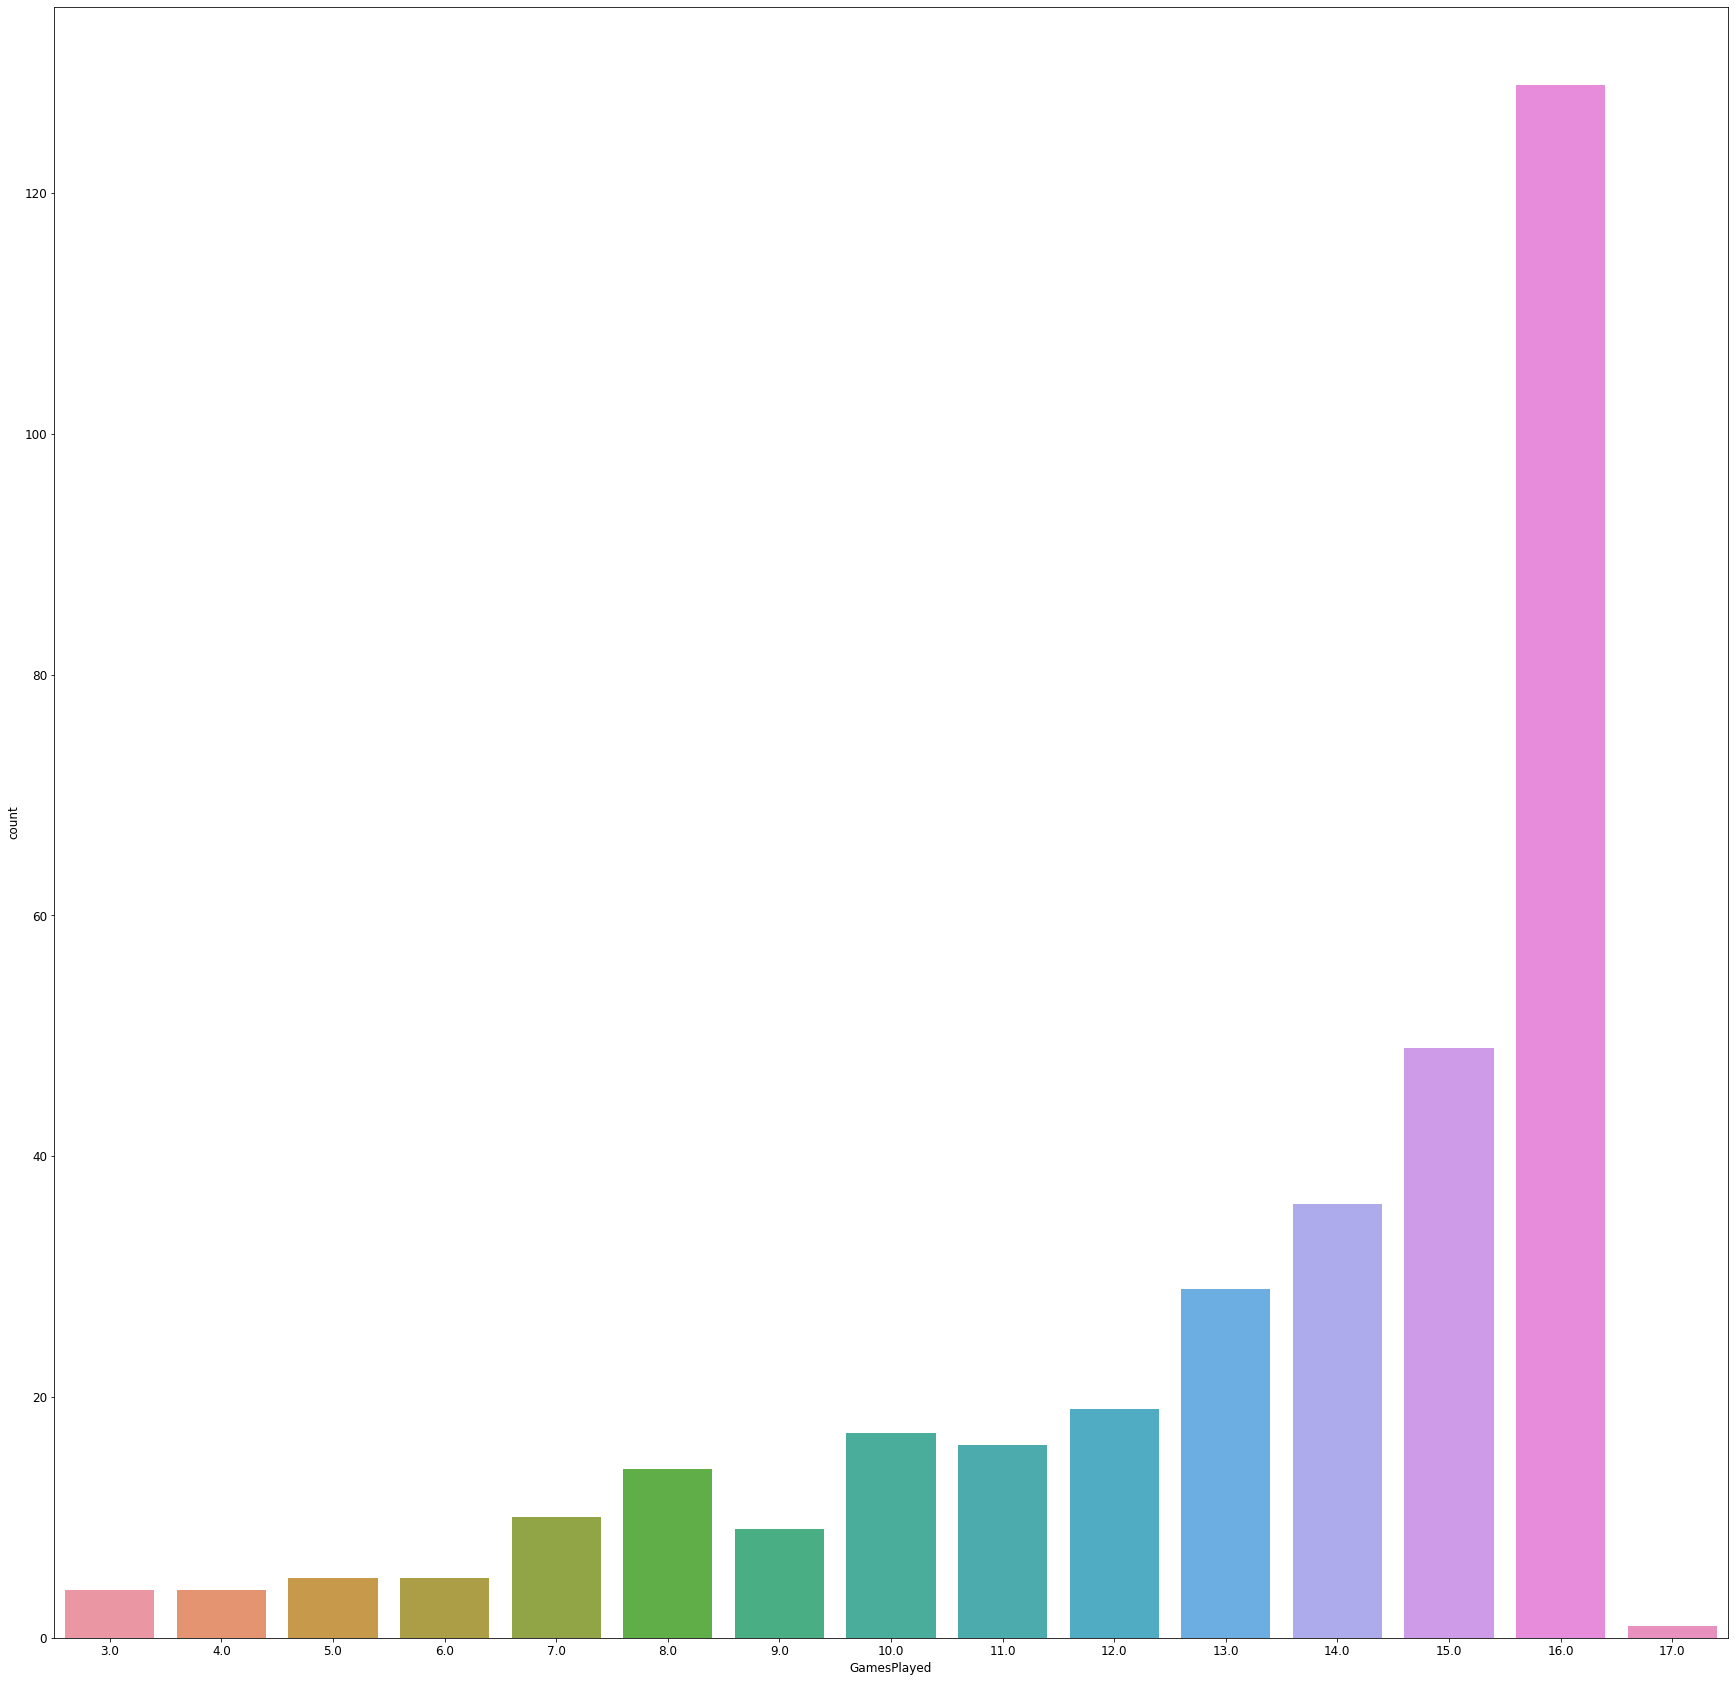

In [87]:
sns.countplot(x="GamesPlayed", data=df1)#all teams play 16 games total; 17 seems wrong

In [88]:
print(df1['GamesPlayed'].value_counts())

16.0    129
15.0     49
14.0     36
13.0     29
12.0     19
10.0     17
11.0     16
8.0      14
7.0      10
9.0       9
5.0       5
6.0       5
3.0       4
4.0       4
17.0      1
Name: GamesPlayed, dtype: int64


In [89]:
temp = df1[df1['GamesPlayed']==17] #with research, found player trade caused this wr to play 17 games; rare anomoly, keeping data
temp.head()

,Player,Pos,GamesPlayed,GamesStarted,PassingYds,PassingTD,Interceptions,RushingYds,RushingTD,FumblesLost,Targets,Receptions,ReceivingYds,ReceivingTD,FantasyPoints
102,Emmanuel Sanders,WR,17.0,16.0,35.0,1.0,0.0,0.0,0.0,0.0,97.0,66.0,869.0,5.0,188.3


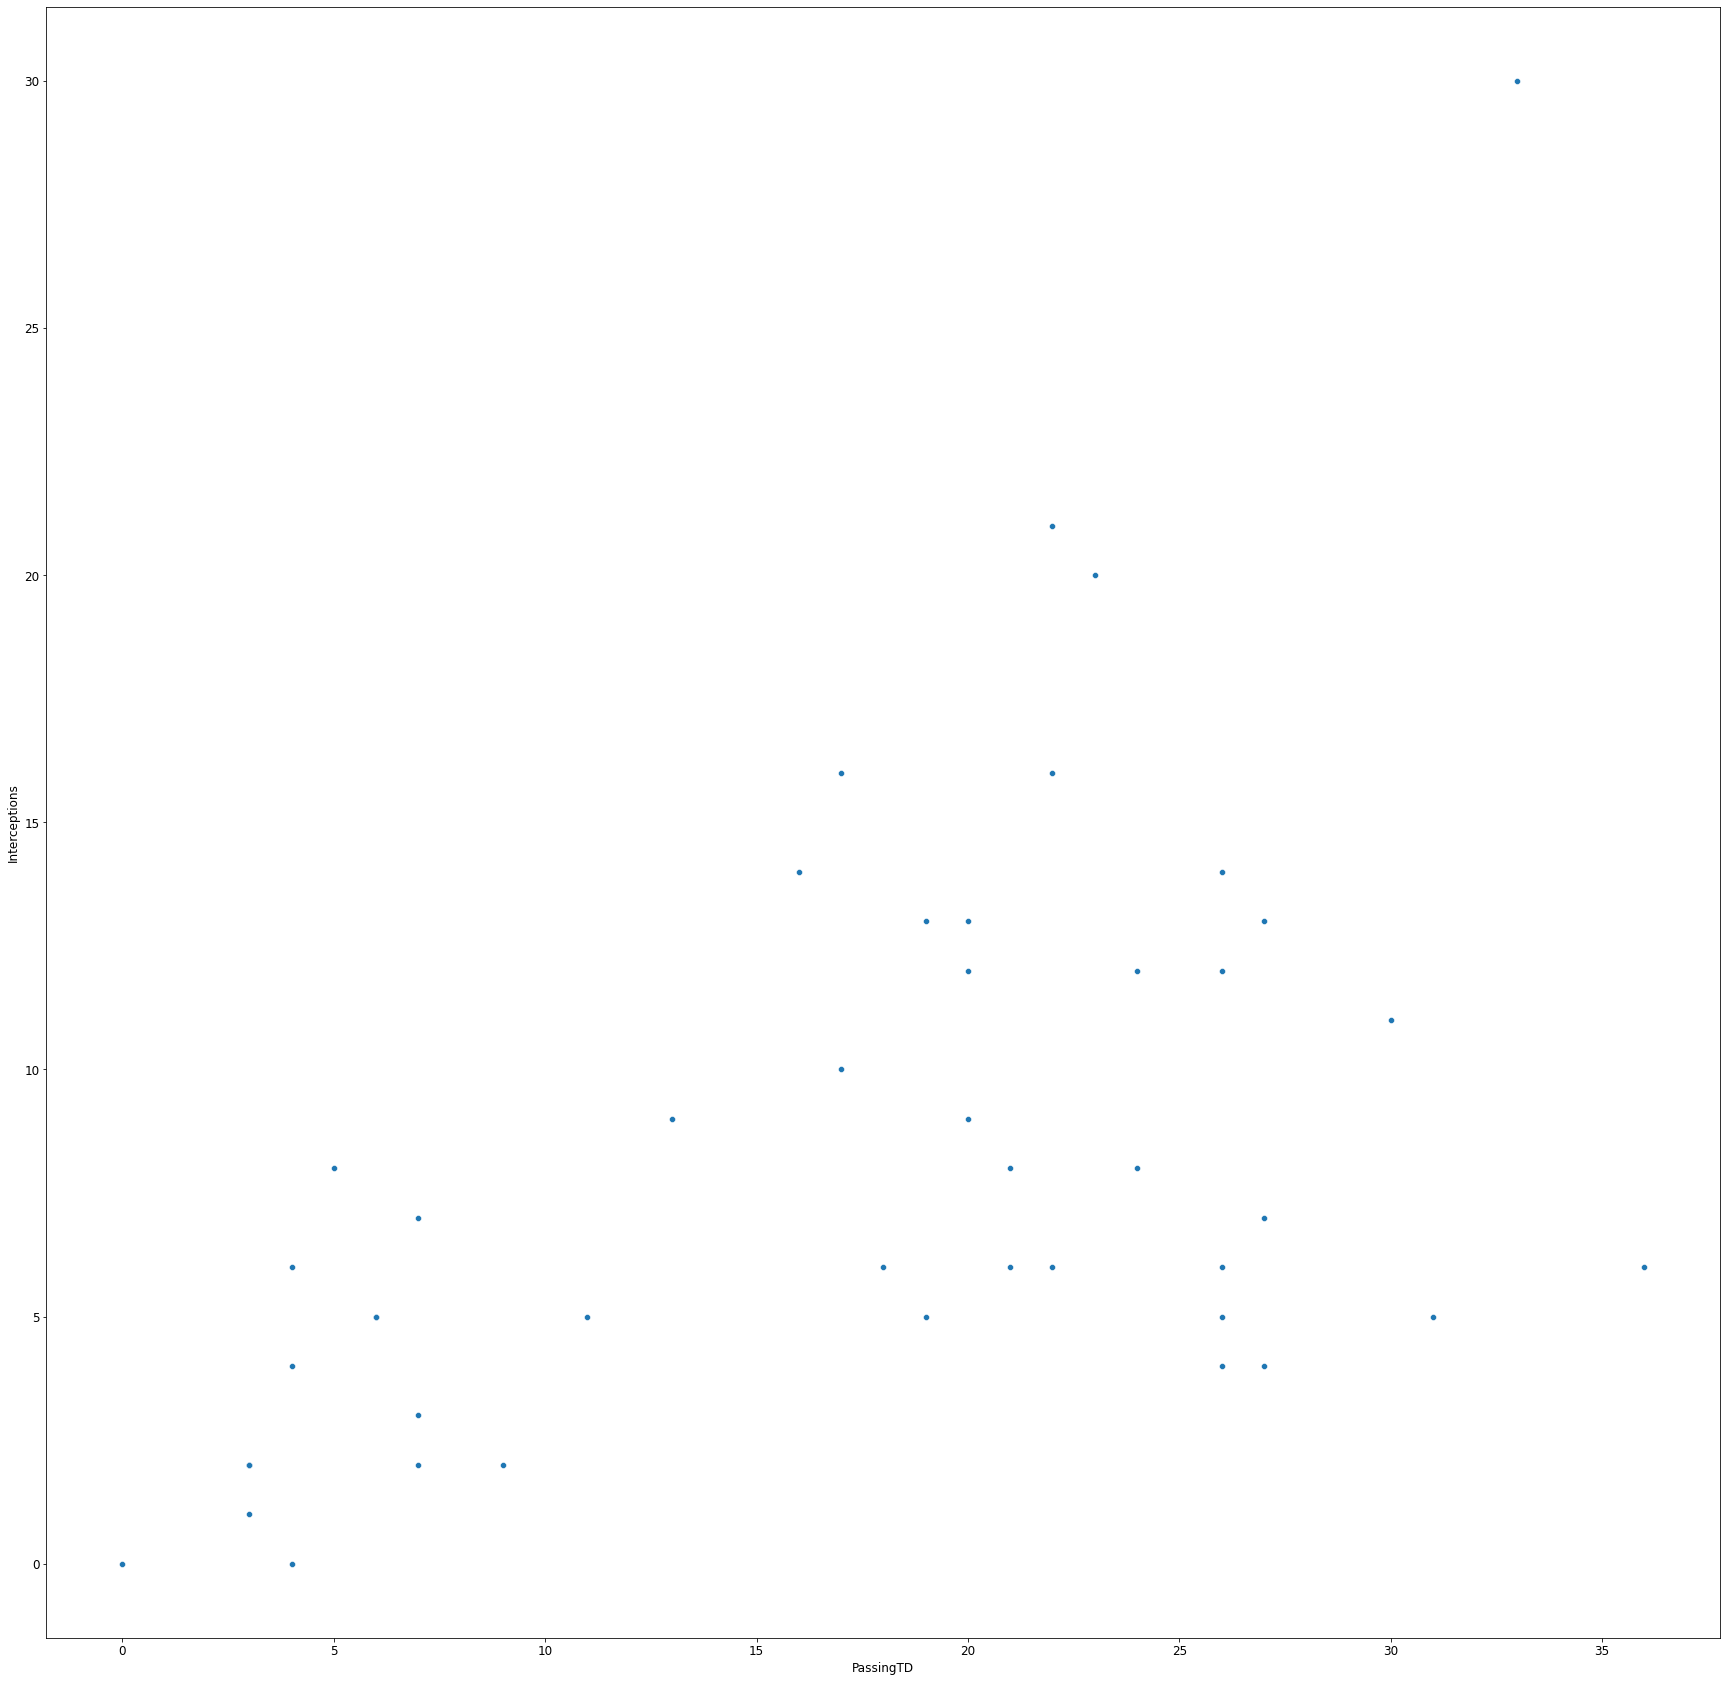

In [90]:
sns.scatterplot(x = "PassingTD", y = "Interceptions", data = df_qb)

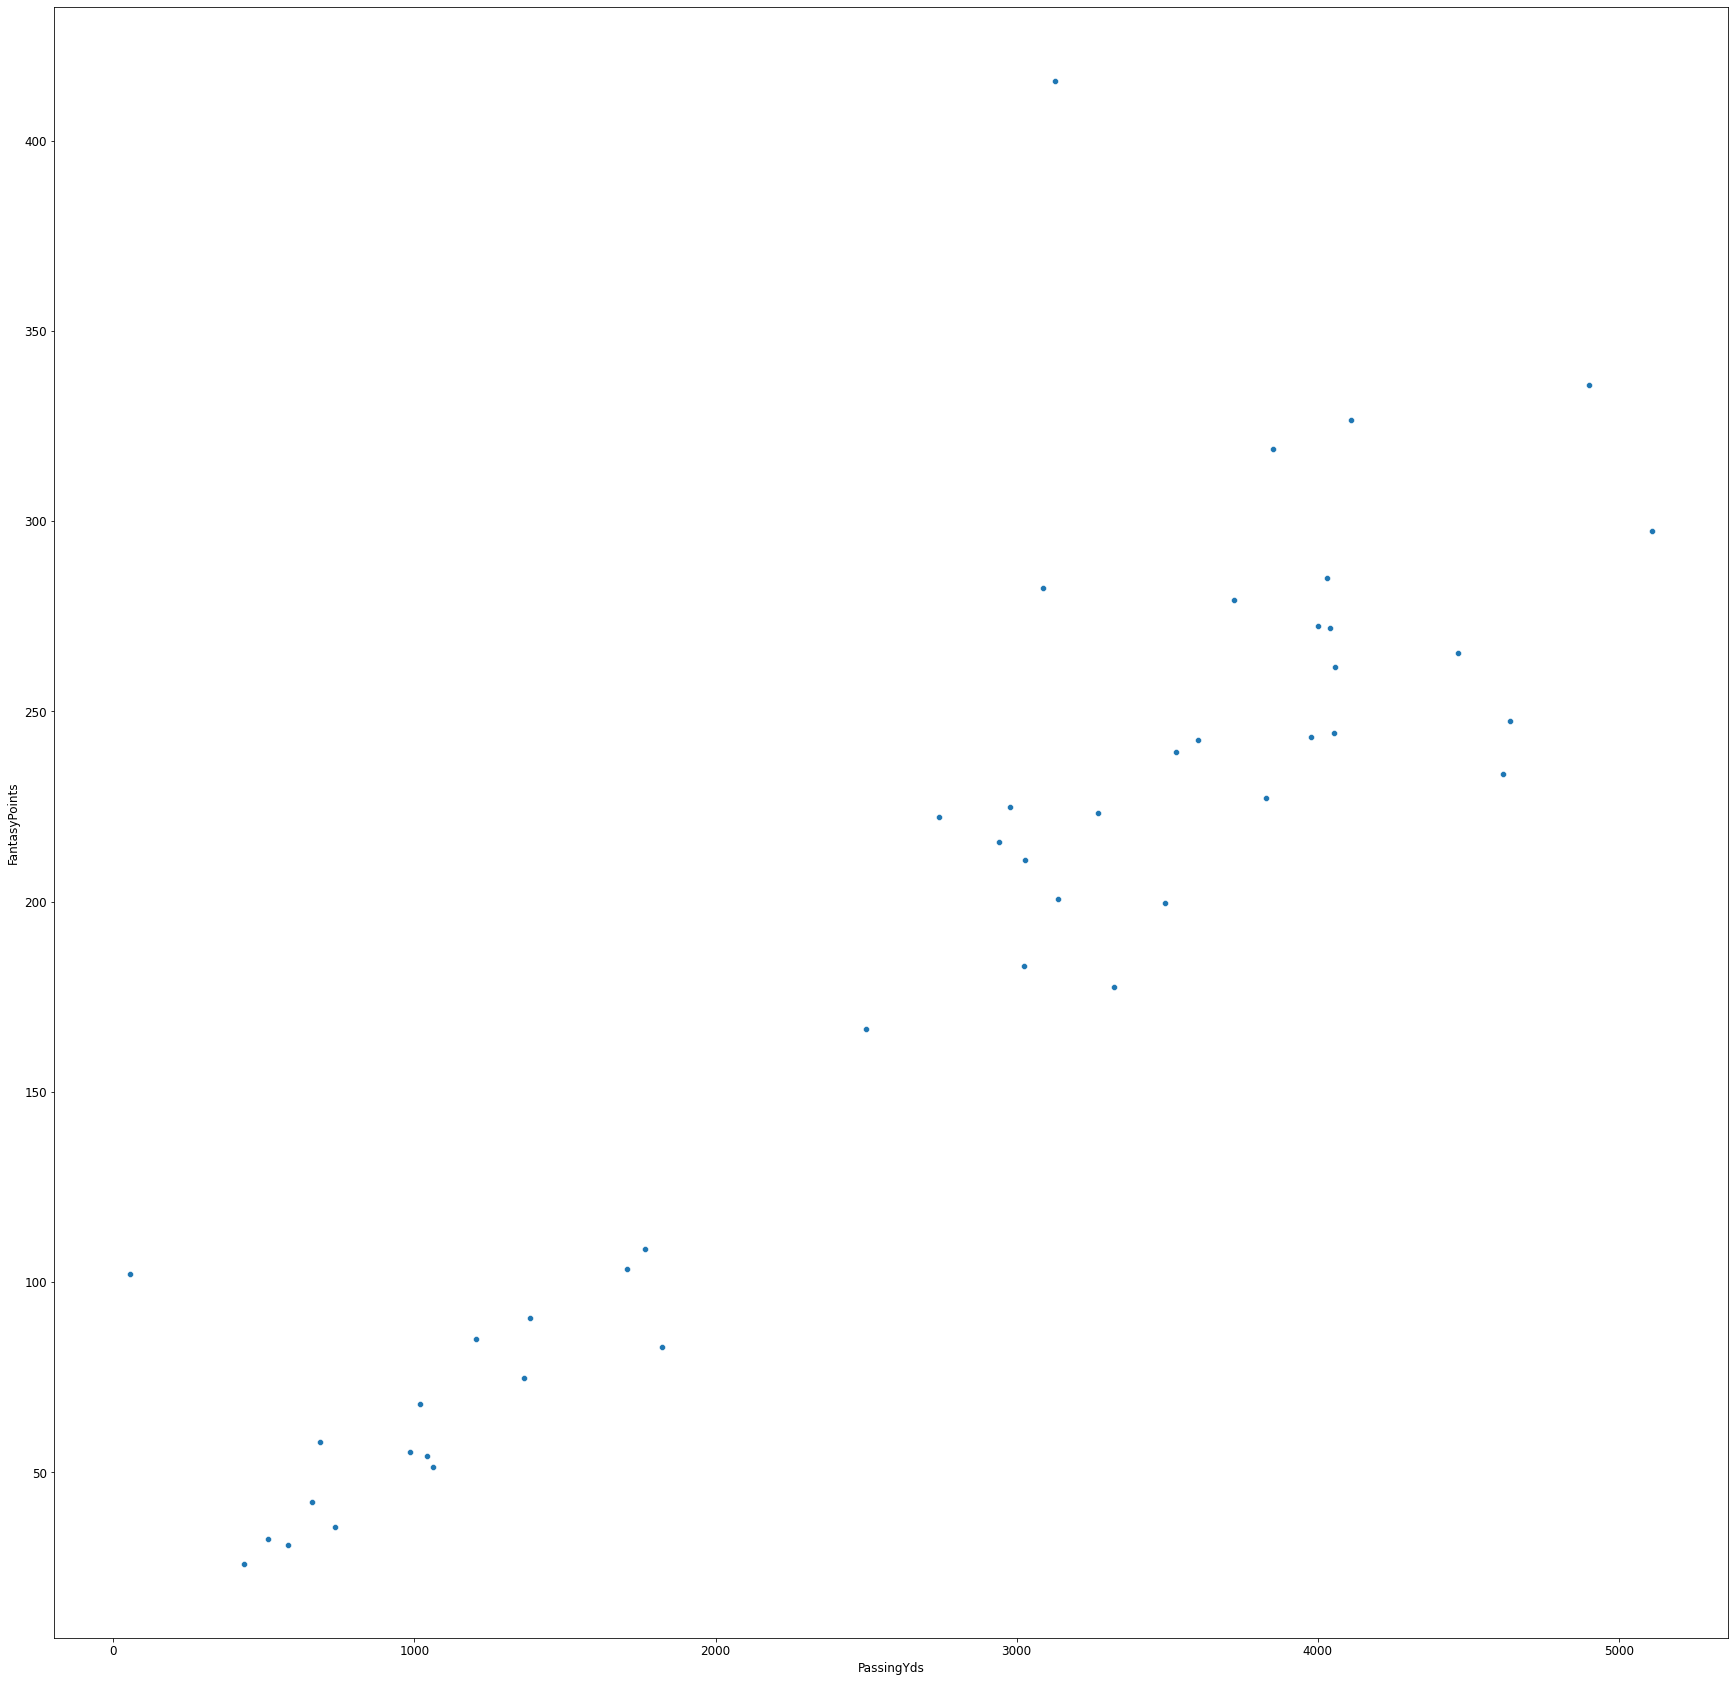

In [91]:
sns.scatterplot(x = "PassingYds", y = "FantasyPoints", data = df_qb)

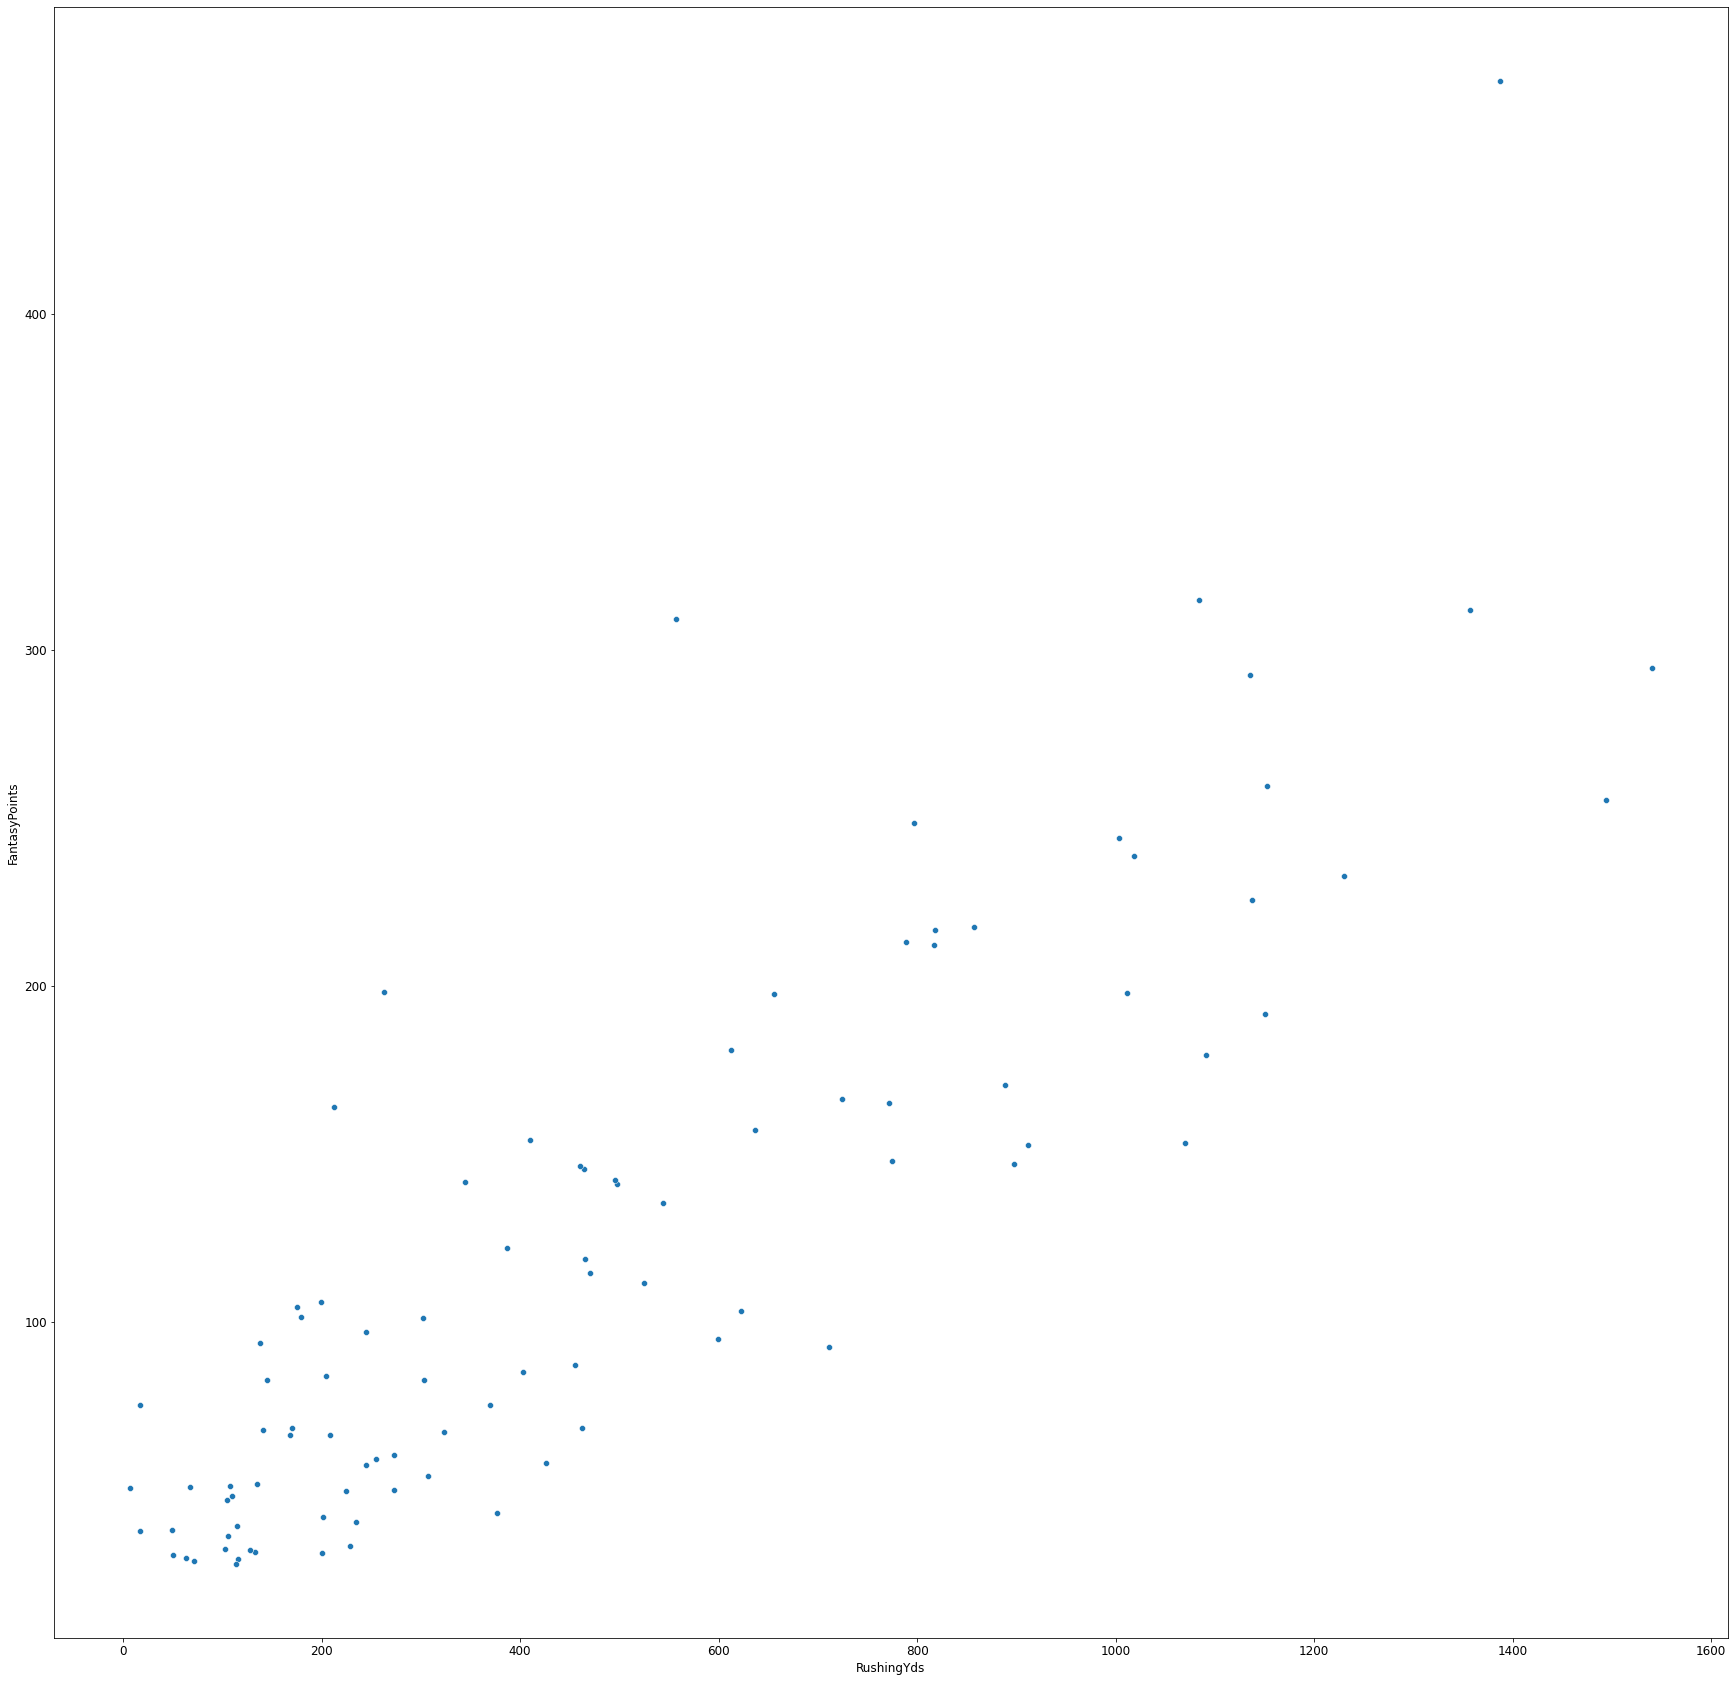

In [92]:
sns.scatterplot(x = "RushingYds", y = "FantasyPoints", data = df_rb)

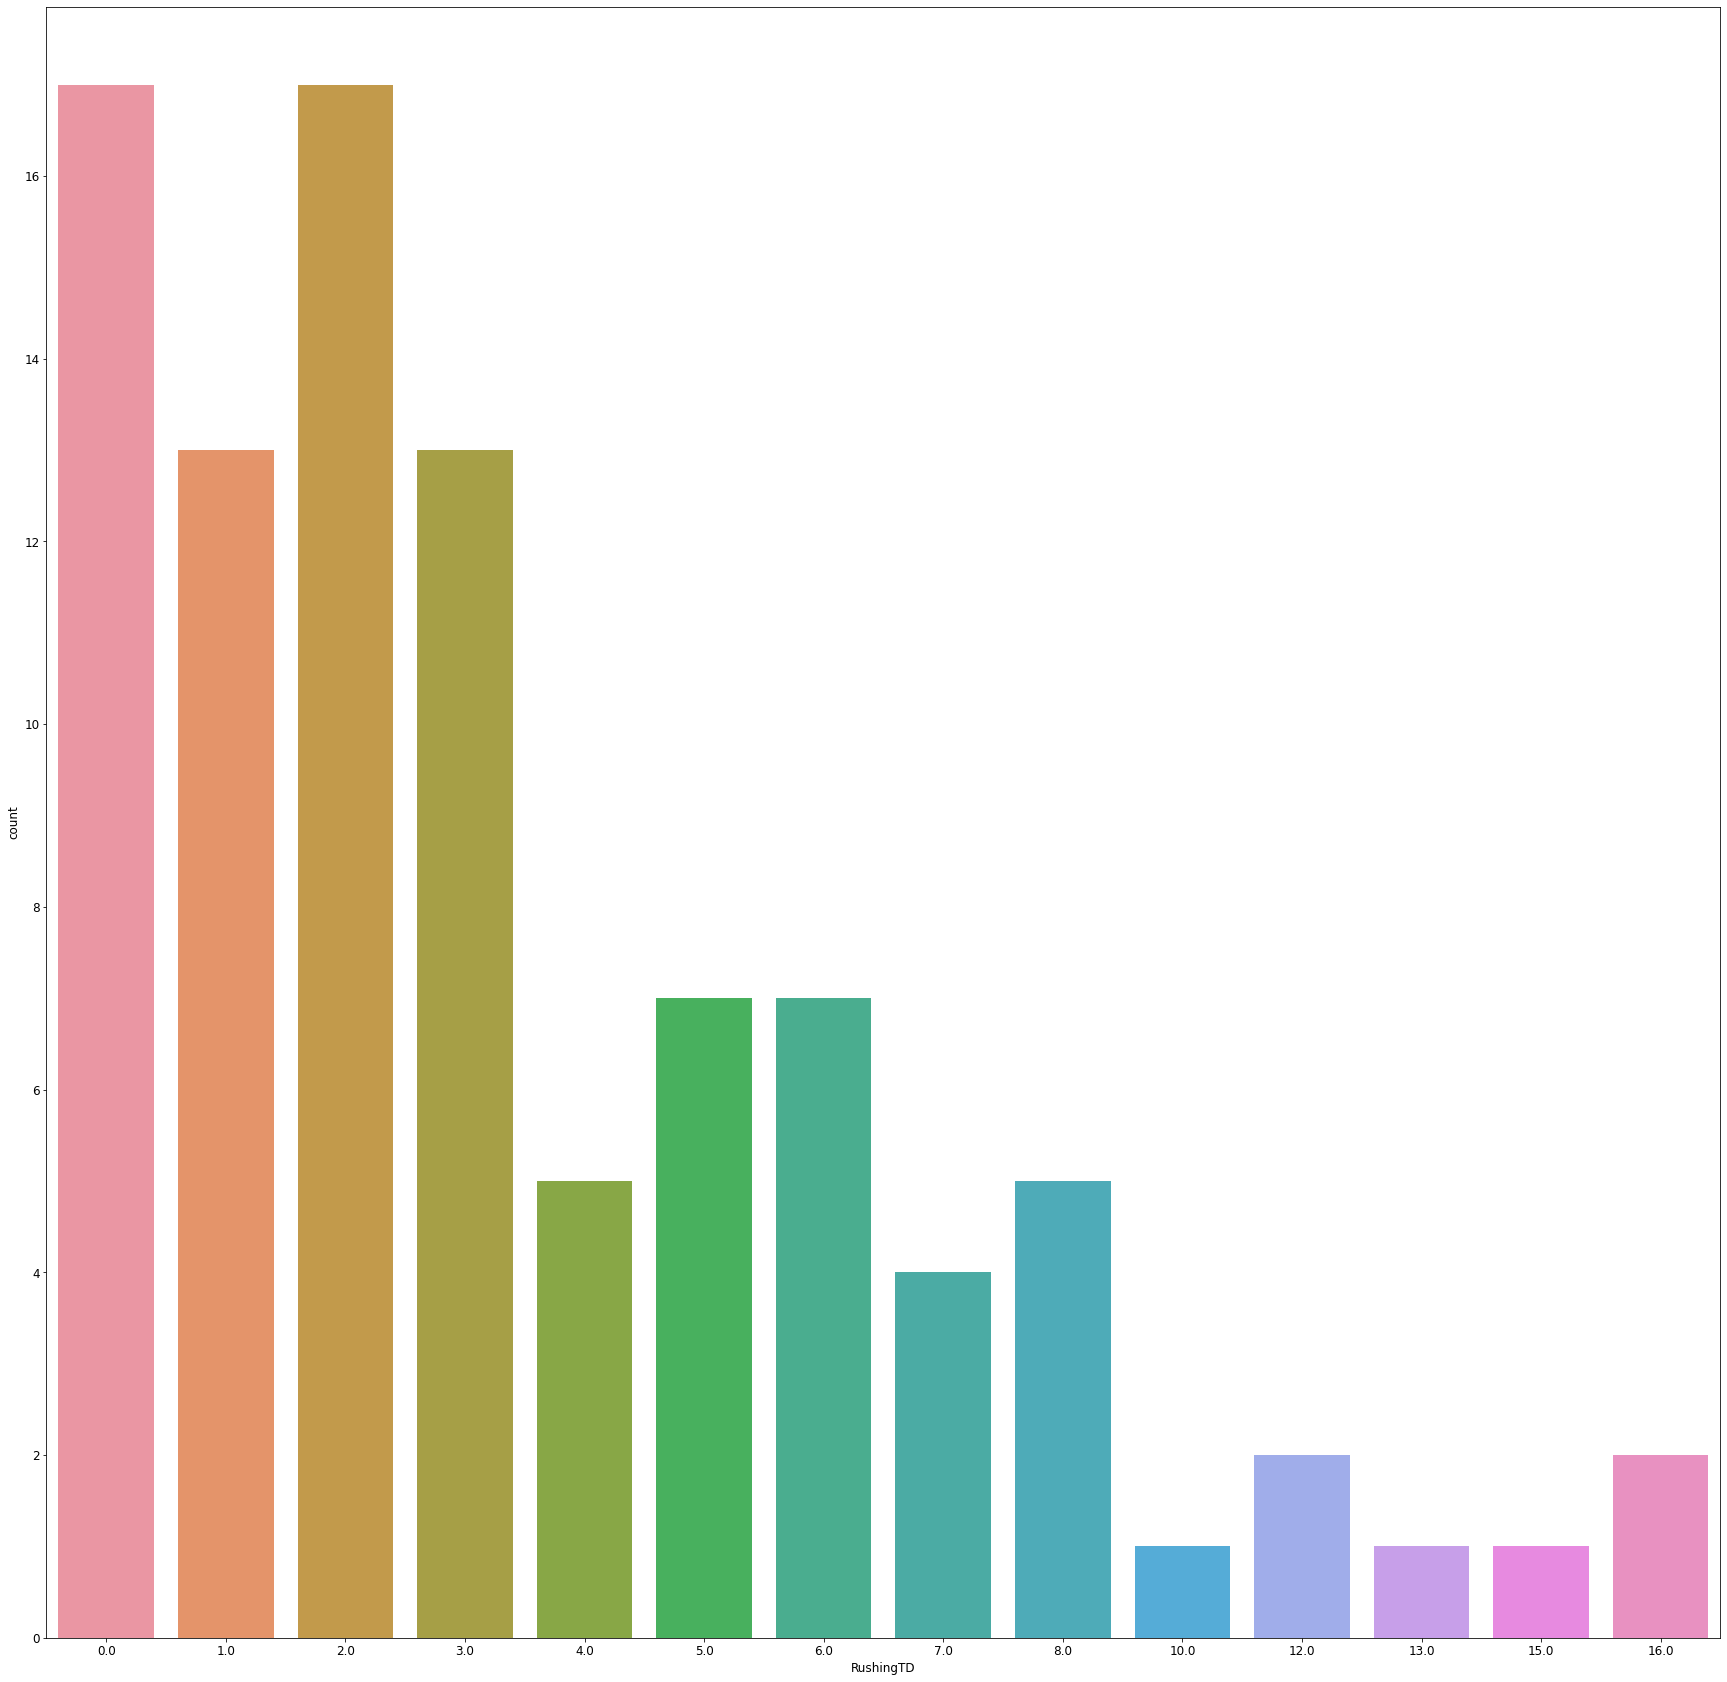

In [93]:
sns.countplot(x="RushingTD", data=df_rb)

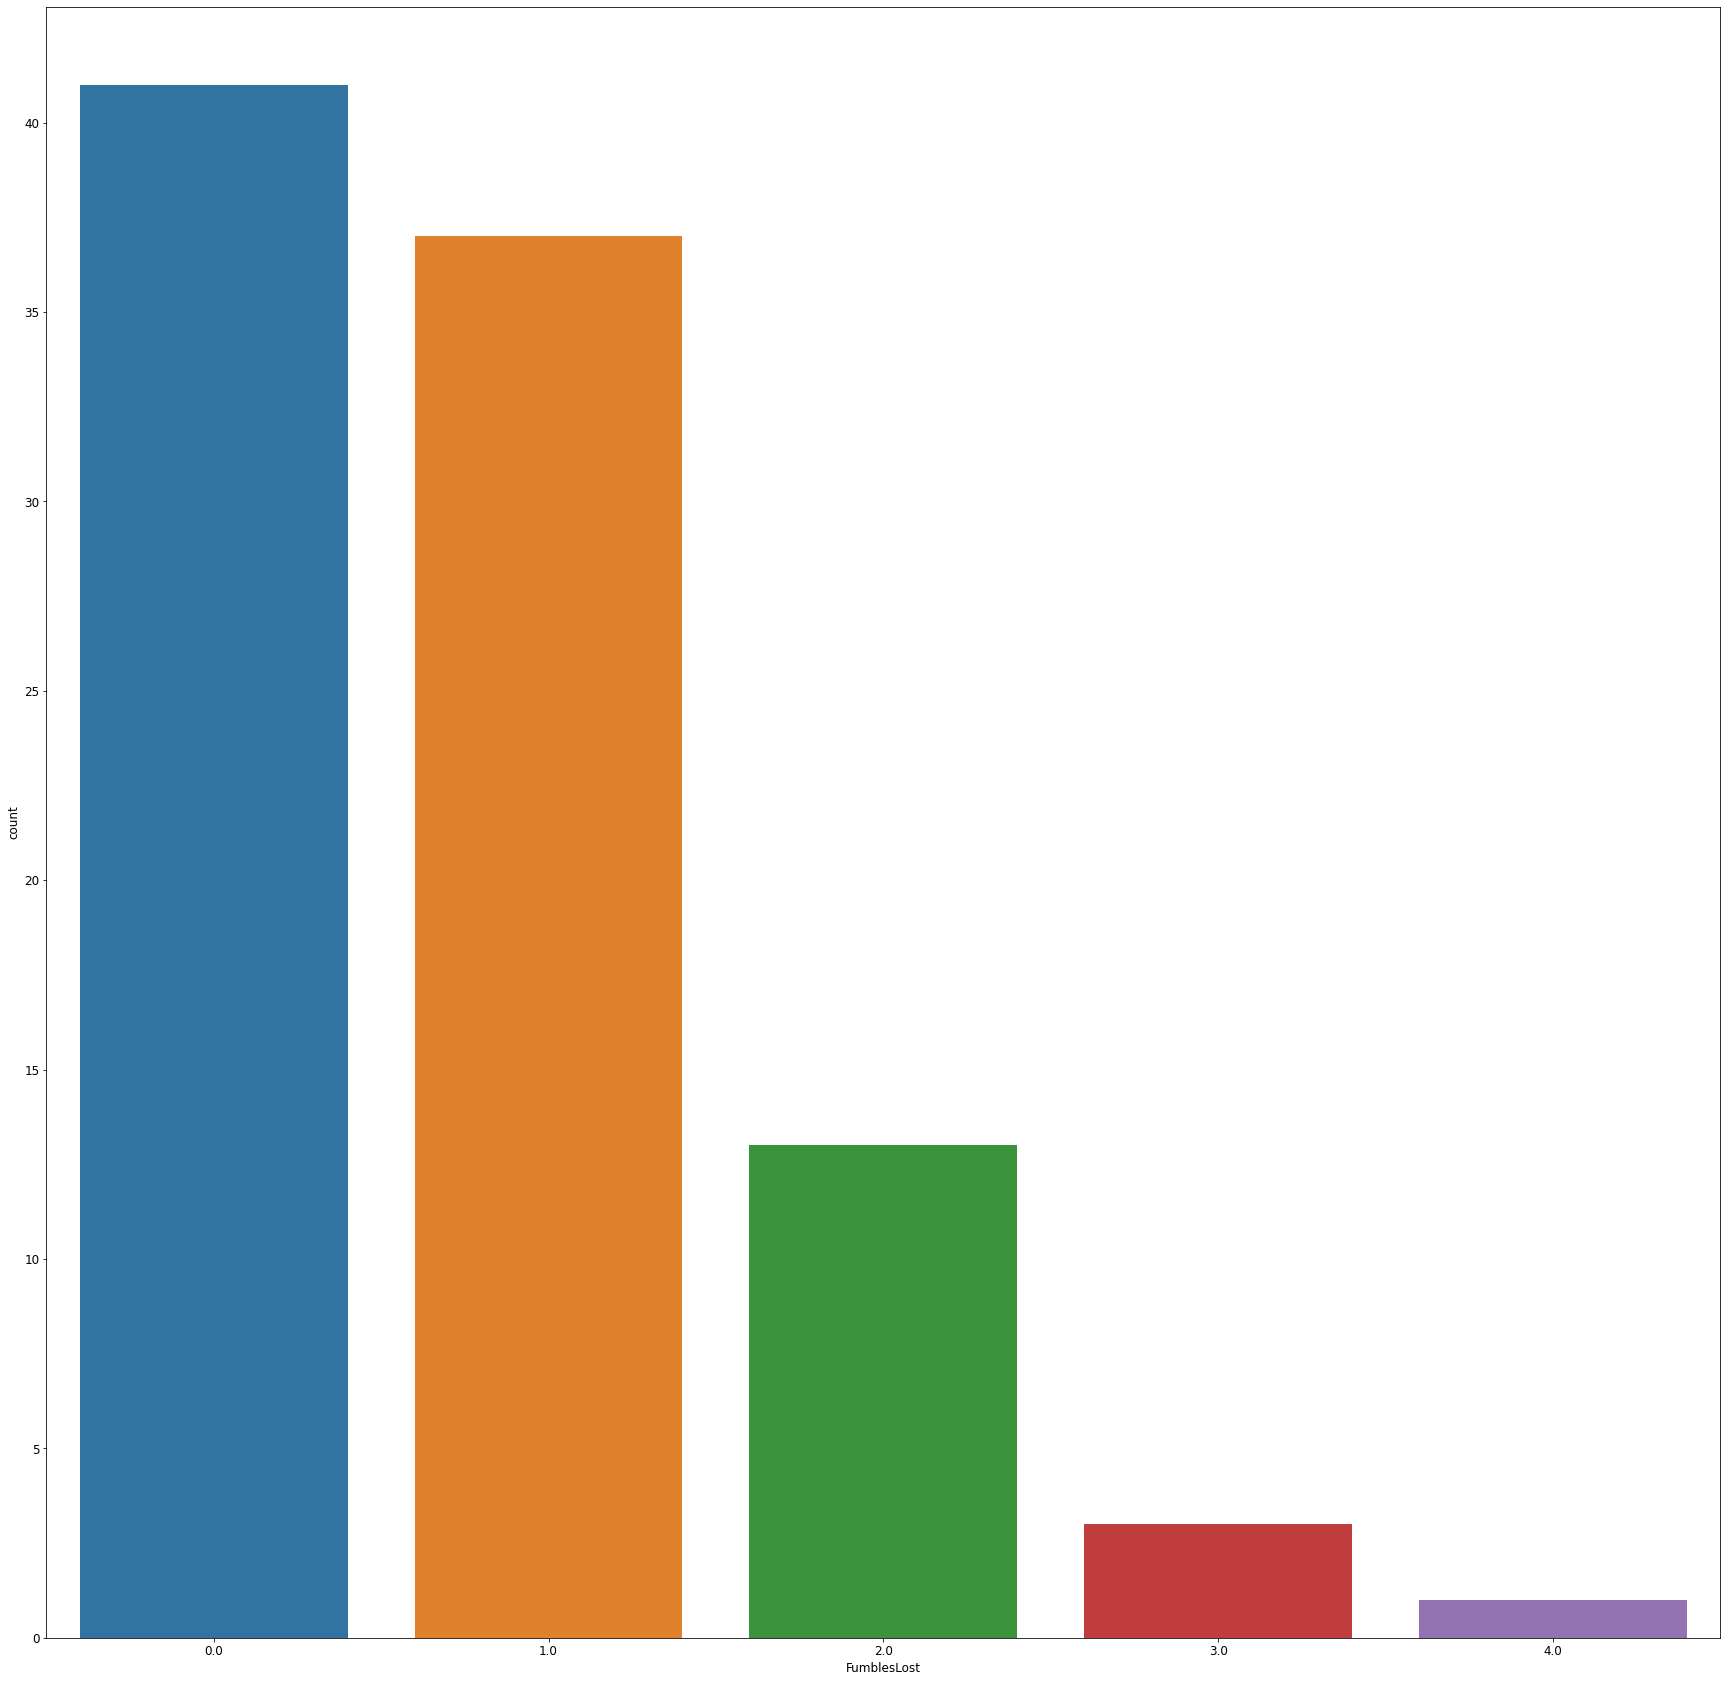

In [94]:
sns.countplot(x="FumblesLost", data=df_rb)

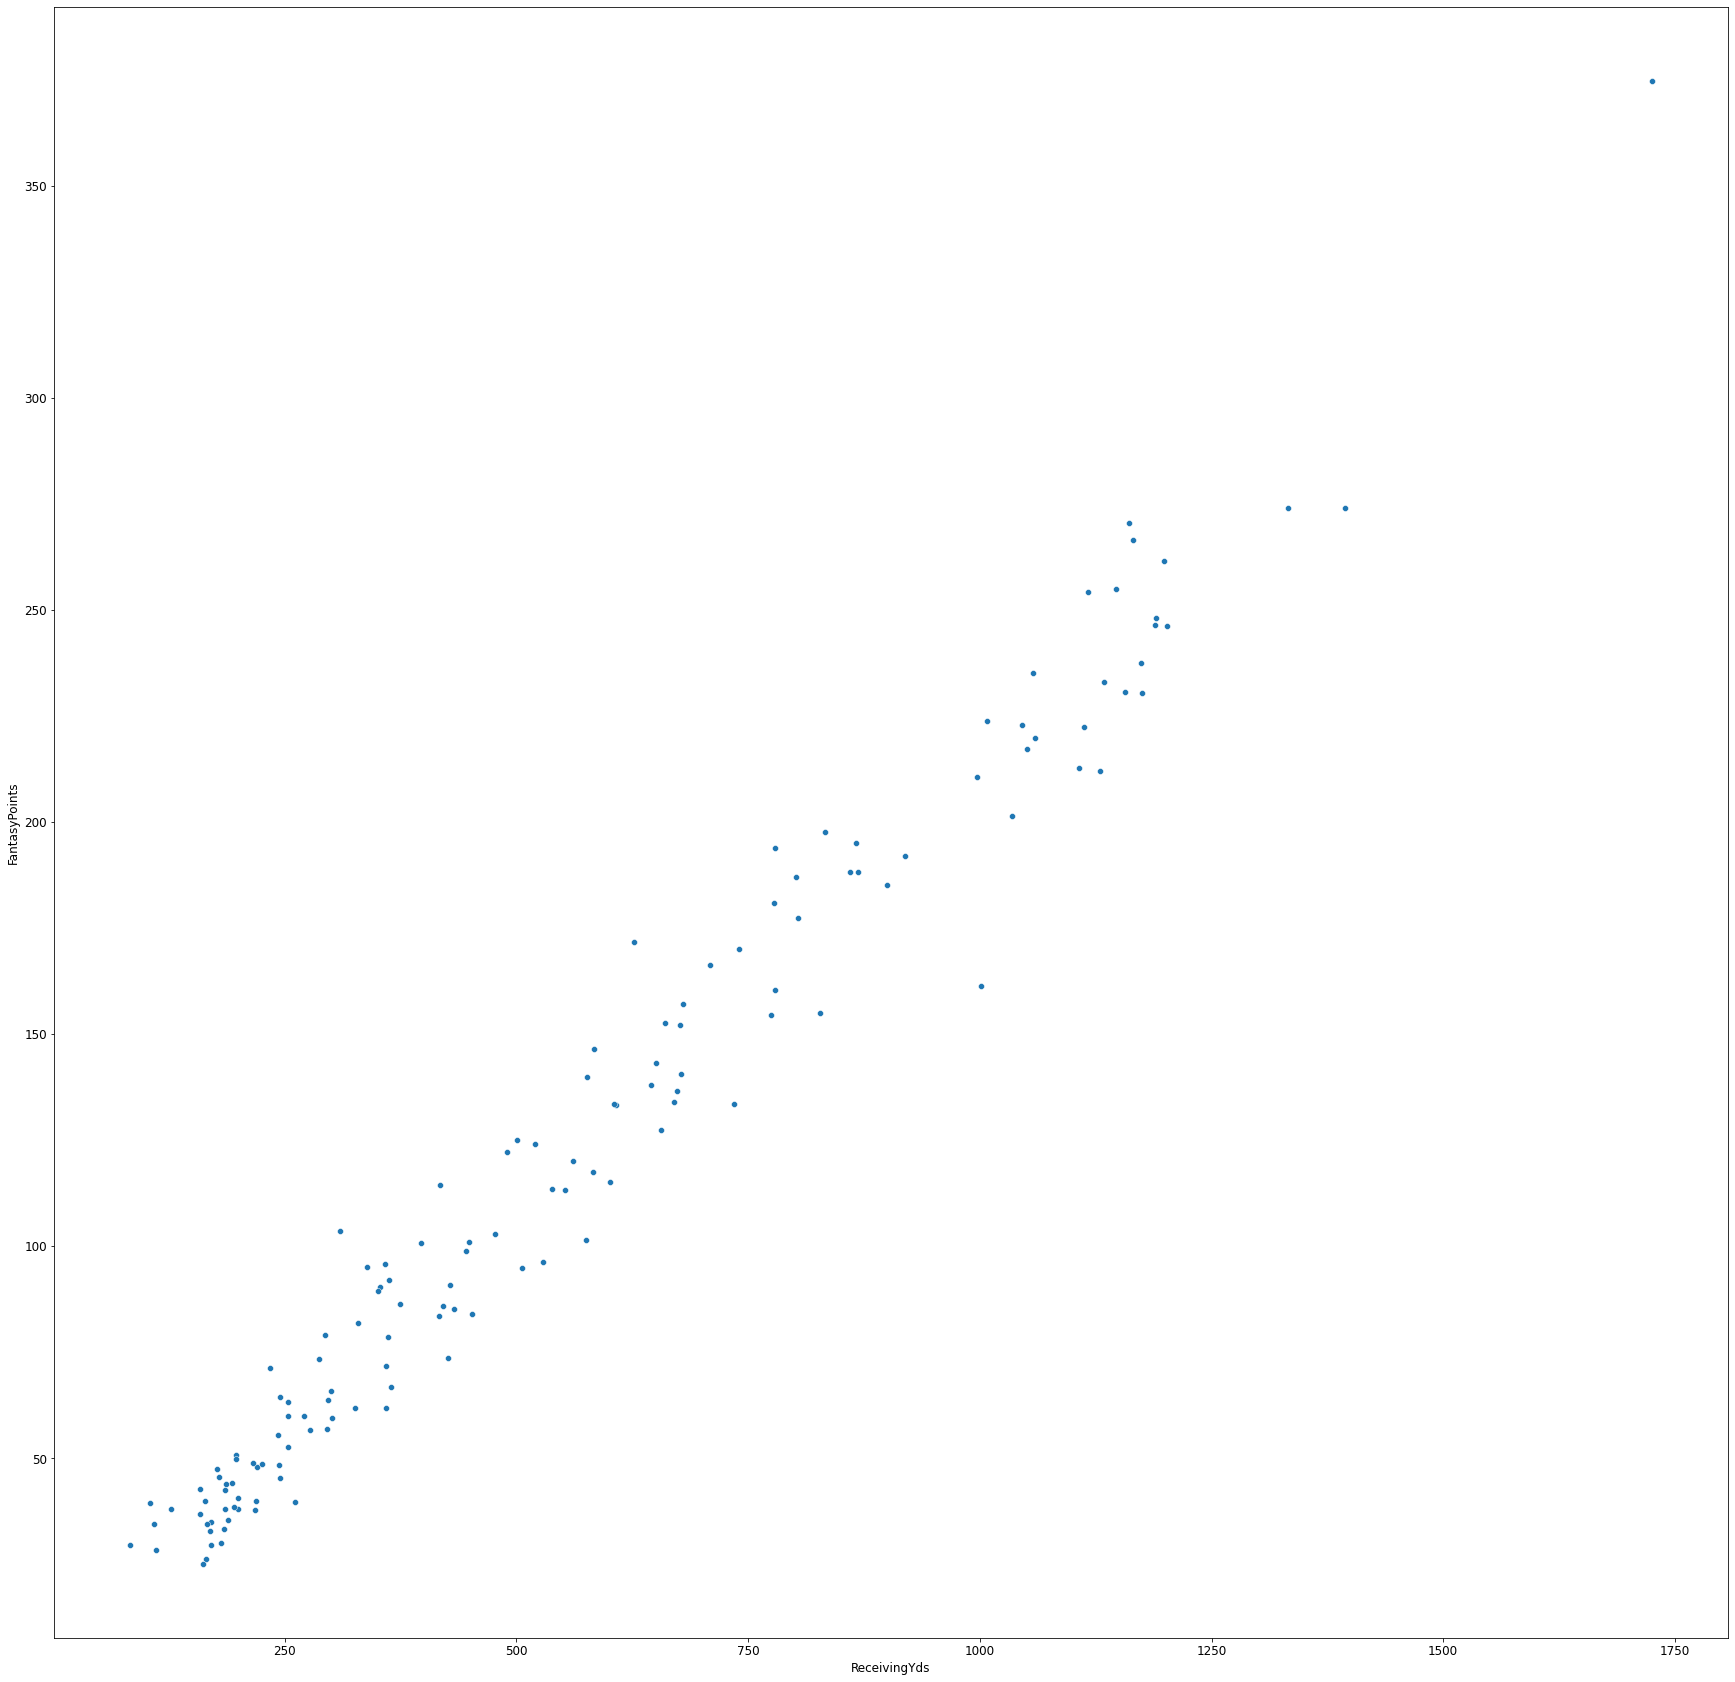

In [95]:
sns.scatterplot(x = "ReceivingYds", y = "FantasyPoints", data = df_wr)

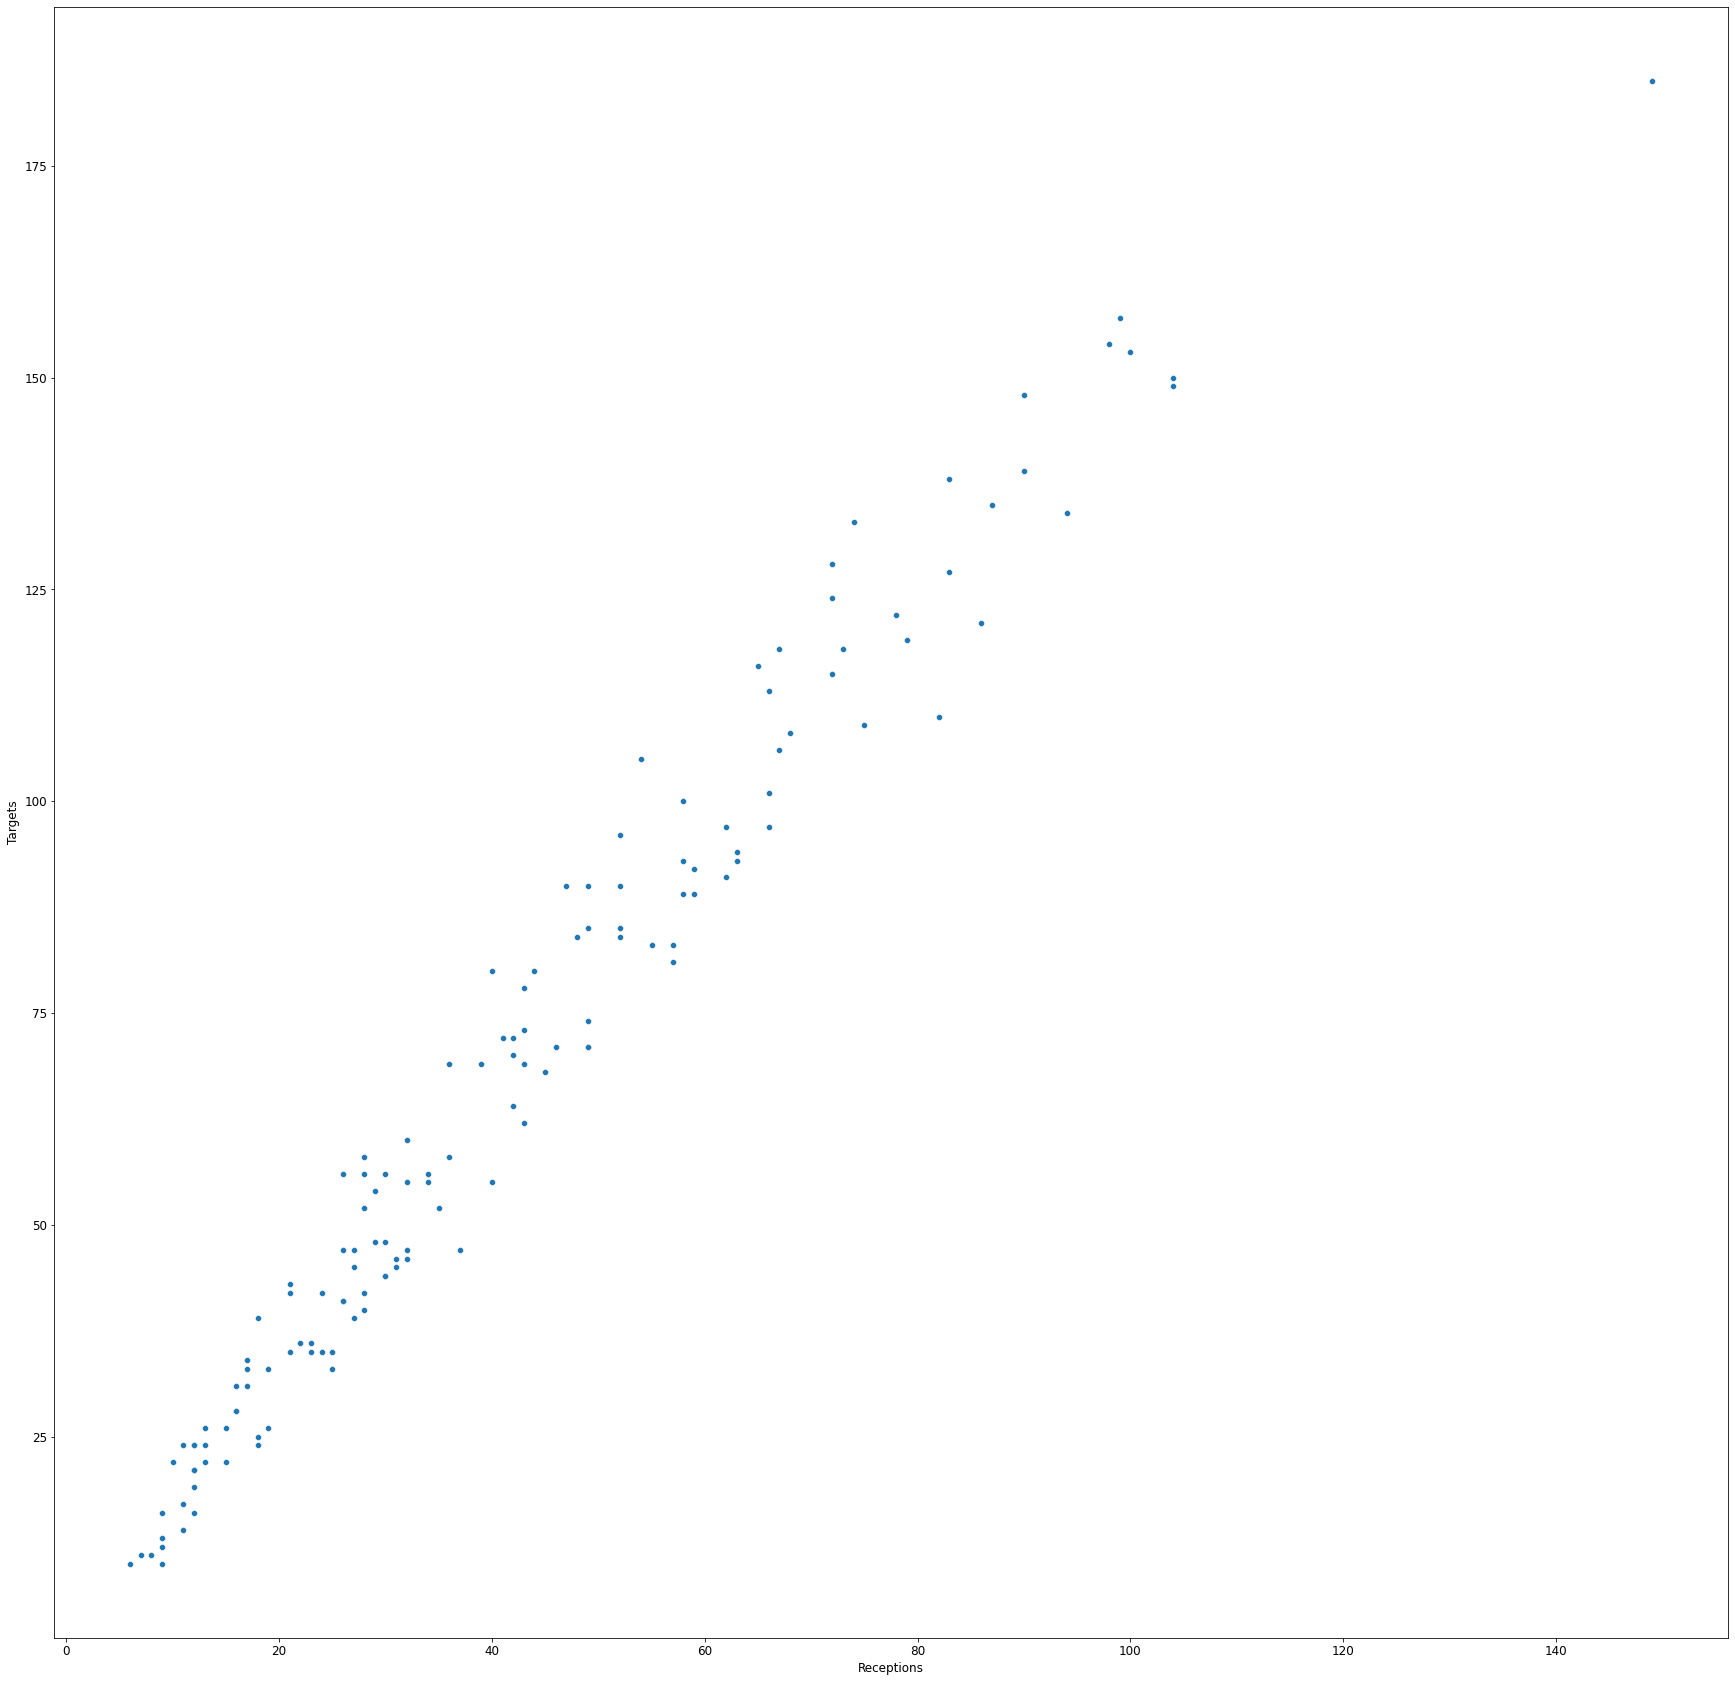

In [96]:
sns.scatterplot(x = "Receptions", y = "Targets", data = df_wr)

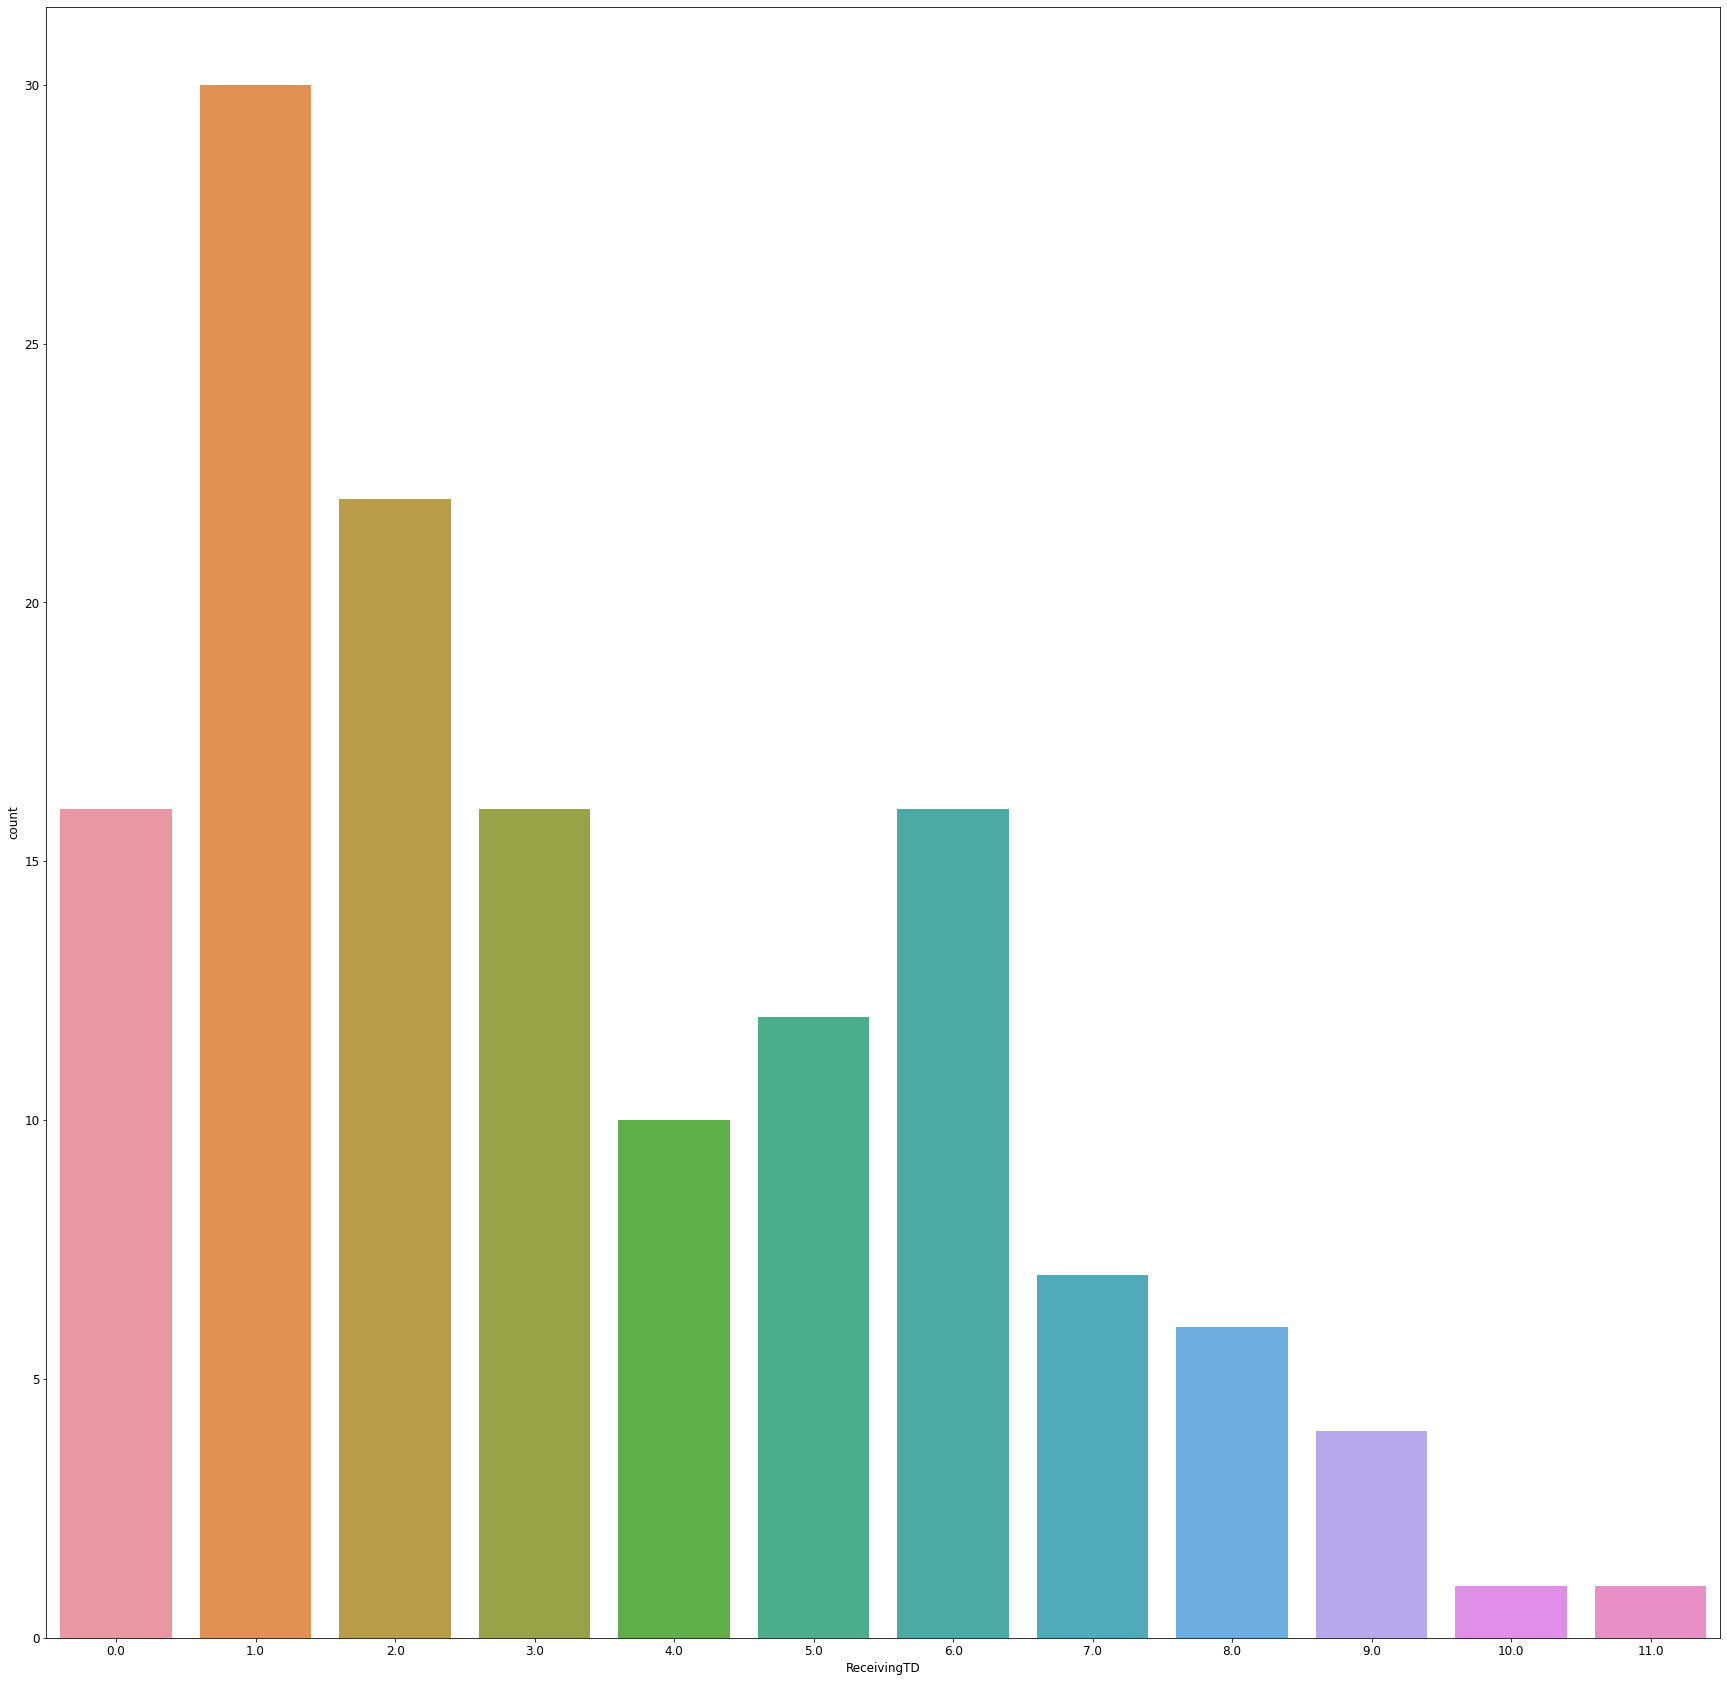

In [97]:
sns.countplot(x="ReceivingTD", data=df_wr)